In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

import tensorflow as tf
from tensorflow import keras
import os
import datetime

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [33]:
# 리눅스 한글 설정
plt.rc('font', family = 'NanumGothic')

In [34]:
file = '2013~2023 한국 기온,습도,풍속.csv'
file2 = '한국기후 평균 최고 최저.csv'

In [35]:
df = pd.read_csv(file, encoding = 'cp949')
df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)
df1.head()

/tmp/ipykernel_67094/207623365.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(file2, encoding = 'cp949', header = 0)


,\t\t지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,105,강릉,1970-01-01,3.2,10.3,-0.5
1,105,강릉,1970-01-02,1.8,5.1,-0.2
2,105,강릉,1970-01-03,-0.3,4.8,-2.2
3,105,강릉,1970-01-04,-5.9,-1.7,-12.6
4,105,강릉,1970-01-05,-7.9,-0.8,-14.7


In [36]:
df1.columns = ['지점번호', '지점명', '일시', '평균기온(℃)', '최고기온(℃)', '최저기온(℃)']
df1 = df1.iloc[:, 2:]
df1.head()

,일시,평균기온(℃),최고기온(℃),최저기온(℃)
0,1970-01-01,3.2,10.3,-0.5
1,1970-01-02,1.8,5.1,-0.2
2,1970-01-03,-0.3,4.8,-2.2
3,1970-01-04,-5.9,-1.7,-12.6
4,1970-01-05,-7.9,-0.8,-14.7


In [37]:
df

,지점번호,지점명,일시,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
0,105,강릉,2013-01-01,-1.9,3.8,-6.7,50.6,2.9
1,105,강릉,2013-01-02,-6.0,-1.3,-9.9,29.9,4.4
2,105,강릉,2013-01-03,-7.5,-0.7,-11.1,25.8,4.0
3,105,강릉,2013-01-04,-4.9,1.8,-10.6,31.1,3.2
4,105,강릉,2013-01-05,-1.7,2.8,-5.4,30.4,4.3
...,...,...,...,...,...,...,...,...
62059,184,제주,2023-08-11,29.6,34.1,26.6,64.6,4.0
62060,184,제주,2023-08-12,29.7,33.3,27.2,66.6,2.7
62061,184,제주,2023-08-13,29.2,32.6,26.3,65.3,3.0
62062,184,제주,2023-08-14,28.9,32.3,26.4,69.9,3.4


In [38]:
df_korea = df.drop(['지점번호', '지점명'], axis = 1).groupby(['일시']).mean()
df_temp = df1.drop(['최저기온(℃)'], axis = 1).groupby(['일시']).mean()
df_korea.head(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2013-01-01,-0.76250,4.43750,-6.21250,73.10000,2.33125
2013-01-02,-4.70000,0.54375,-8.98125,53.29375,3.58750
2013-01-03,-8.09375,-3.99375,-11.26250,48.90000,3.40625
2013-01-04,-6.74375,-1.15000,-11.61875,50.25000,2.03125
2013-01-05,-3.81250,1.75625,-9.41875,57.06250,2.28125
2013-01-06,-2.32500,2.52500,-5.73750,57.04375,1.96875
2013-01-07,-2.00625,3.35000,-6.72500,49.62500,1.95000
2013-01-08,-1.22500,3.76875,-5.28750,50.66250,2.15625
2013-01-09,-4.01875,-0.80625,-7.14375,45.38125,3.41250


In [39]:
df_korea.tail(10)

,평균기온(℃),최고기온(℃),최저기온(℃),평균습도(%rh),평균풍속(m/s)
일시,,,,,
2023-08-06,29.40625,33.70000,26.15625,74.78750,1.95000
2023-08-07,29.28750,33.62500,26.05625,74.49375,2.43750
2023-08-08,29.08125,33.11875,25.81875,71.57500,2.92500
2023-08-09,26.48125,28.96250,24.30625,81.06250,3.91875
2023-08-10,23.74375,25.91875,22.36875,88.73125,4.73125
2023-08-11,26.24375,29.97500,22.85625,79.02500,2.83750
2023-08-12,25.86250,29.23125,23.14375,81.25000,1.88125
2023-08-13,26.88750,31.00625,23.51875,77.77500,1.60000
2023-08-14,27.40000,31.66250,24.34375,77.50000,1.77500


In [40]:
df_korea.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3879 entries, 2013-01-01 to 2023-08-15
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   평균기온(℃)    3879 non-null   float64
 1   최고기온(℃)    3879 non-null   float64
 2   최저기온(℃)    3879 non-null   float64
 3   평균습도(%rh)  3879 non-null   float64
 4   평균풍속(m/s)  3879 non-null   float64
dtypes: float64(5)
memory usage: 181.8+ KB


In [41]:
df_temp.head()

,평균기온(℃),최고기온(℃)
일시,,
1970-01-01,1.33125,6.86875
1970-01-02,1.86875,5.88125
1970-01-03,0.21250,4.08125
1970-01-04,-6.36250,-2.43750
1970-01-05,-9.46875,-4.73125


In [42]:
filter2 = df_temp.index == '1974-10-16' 
df_temp[filter2]

,평균기온(℃),최고기온(℃)
일시,,
1974-10-16,13.6625,20.7875


In [43]:
filter1 = df_temp['최고기온(℃)'].isna() == True
df_temp['최고기온(℃)'][filter1] = 20.7875

In [44]:
df_korea = df_korea.reset_index()

In [45]:
df_korea['일시']  = pd.to_datetime(df_korea['일시'])
df_korea.set_index('일시', inplace = True)

Text(0.5, 1.0, '10년간 일별 평균기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


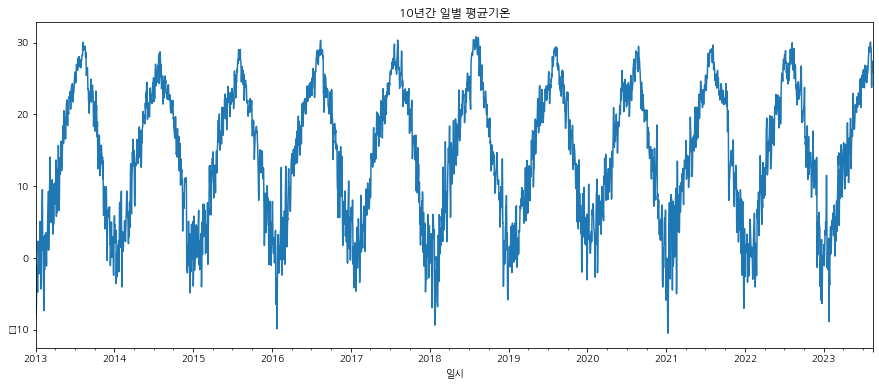

In [46]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균기온(℃)'].plot()
axe.set_title('10년간 일별 평균기온')

Text(0.5, 1.0, '10년간 일별 최저기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


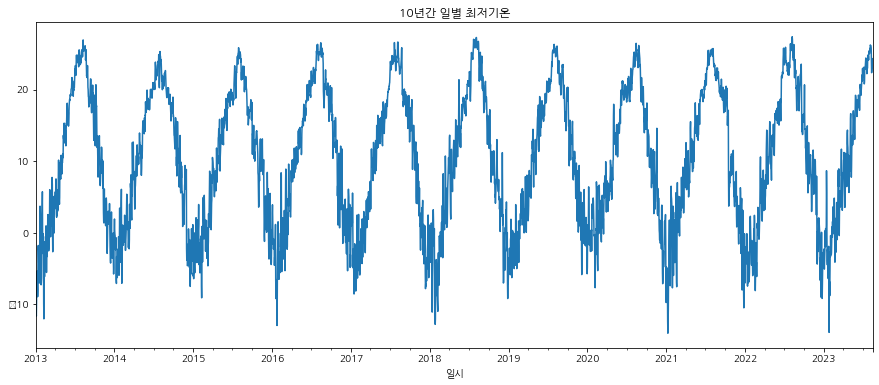

In [47]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['최저기온(℃)'].plot()
axe.set_title('10년간 일별 최저기온')
# 겨울의 병원균을 옮기는 곤충, 동물, 조류들이 동면이 가능한지 보기위한 columns

Text(0.5, 1.0, '10년간 일별 평균습도')

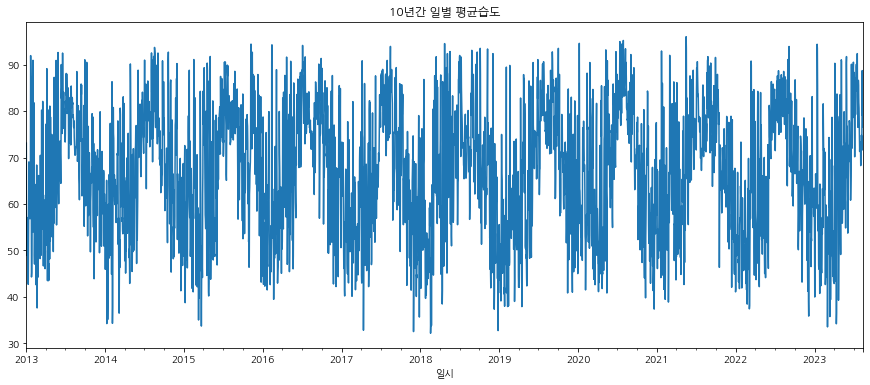

In [48]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균습도(%rh)'].plot()
axe.set_title('10년간 일별 평균습도')

Text(0.5, 1.0, '10년간 일별 평균풍속')

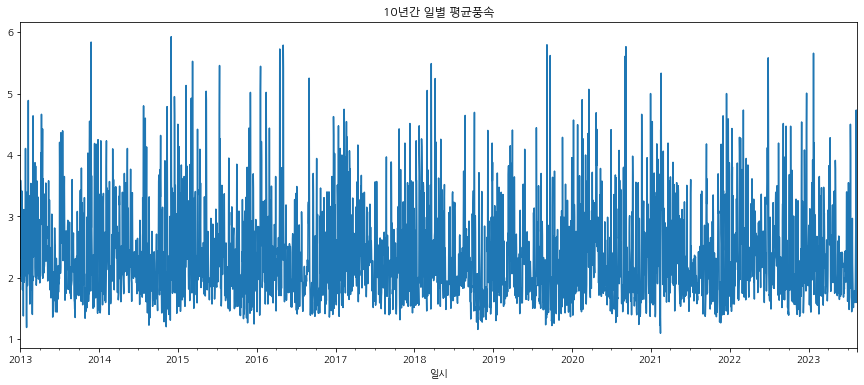

In [49]:
fig, axe = plt.subplots(figsize = (15,6))
df_korea['평균풍속(m/s)'].plot()
axe.set_title('10년간 일별 평균풍속')

## Data Processing

In [50]:
n_col = 1
#dataset = df_korea.iloc[:, :3]
dataset = df_temp.iloc[:, :]
dataset = pd.DataFrame(dataset)
data = dataset.values

data.shape

(19585, 2)

In [51]:
scaler = MinMaxScaler(feature_range = (0 , 1))
scaled_data = scaler.fit_transform(np.array(data))

## Splitting Data

In [52]:
train_size = int(len(data)*0.75)
test_size = len(data) - train_size
print('Train Size :', train_size, 'Test Size : ', test_size)

Train Size : 14688 Test Size :  4897


In [53]:
scaled_data

array([[0.28644888, 0.31922063],
       [0.29945554, 0.29607384],
       [0.25937689, 0.25388222],
       ...,
       [0.90486993, 0.88499854],
       [0.91727163, 0.9003809 ],
       [0.91333938, 0.88983299]])

In [54]:
train_data = scaled_data[0:train_size, :]
train_data.shape

(14688, 2)

## Creating Data Set

In [67]:
x_train = []
y_train = []
time_step = 365
n_col = 2

for i in range(time_step, len(scaled_data)):
    print(time_step, i)
    x_train.append(scaled_data[i-time_step:i, :n_col])
    y_train.append(scaled_data[i, :n_col])
    if i <= time_step:
        print('x_train : ', x_train)
        print('y_train : ', y_train)

365 365
x_train :  [array([[0.28644888, 0.31922063],
       [0.29945554, 0.29607384],
       [0.25937689, 0.25388222],
       [0.10027223, 0.10108409],
       [0.02510587, 0.04731907],
       [0.24319419, 0.25754468],
       [0.22837266, 0.23513038],
       [0.23835451, 0.25388222],
       [0.17211131, 0.16319953],
       [0.20220811, 0.21432757],
       [0.23275862, 0.25212423],
       [0.33318209, 0.35159684],
       [0.15366001, 0.17096396],
       [0.09195402, 0.10225608],
       [0.06488203, 0.05288602],
       [0.05792498, 0.08980369],
       [0.0738052 , 0.09449165],
       [0.12885662, 0.18678582],
       [0.17029643, 0.20773513],
       [0.1822444 , 0.22121301],
       [0.22081065, 0.27175505],
       [0.28055051, 0.32390858],
       [0.25831821, 0.25637269],
       [0.17422868, 0.20700264],
       [0.20886267, 0.27702901],
       [0.2484876 , 0.32566657],
       [0.29401089, 0.34852036],
       [0.3200242 , 0.39789042],
       [0.32577132, 0.39320246],
       [0.31064731, 0.2

365 3921
365 3922
365 3923
365 3924
365 3925
365 3926
365 3927
365 3928
365 3929
365 3930
365 3931
365 3932
365 3933
365 3934
365 3935
365 3936
365 3937
365 3938
365 3939
365 3940
365 3941
365 3942
365 3943
365 3944
365 3945
365 3946
365 3947
365 3948
365 3949
365 3950
365 3951
365 3952
365 3953
365 3954
365 3955
365 3956
365 3957
365 3958
365 3959
365 3960
365 3961
365 3962
365 3963
365 3964
365 3965
365 3966
365 3967
365 3968
365 3969
365 3970
365 3971
365 3972
365 3973
365 3974
365 3975
365 3976
365 3977
365 3978
365 3979
365 3980
365 3981
365 3982
365 3983
365 3984
365 3985
365 3986
365 3987
365 3988
365 3989
365 3990
365 3991
365 3992
365 3993
365 3994
365 3995
365 3996
365 3997
365 3998
365 3999
365 4000
365 4001
365 4002
365 4003
365 4004
365 4005
365 4006
365 4007
365 4008
365 4009
365 4010
365 4011
365 4012
365 4013
365 4014
365 4015
365 4016
365 4017
365 4018
365 4019
365 4020
365 4021
365 4022
365 4023
365 4024
365 4025
365 4026
365 4027
365 4028
365 4029
365 4030
365 4031
3

365 7380
365 7381
365 7382
365 7383
365 7384
365 7385
365 7386
365 7387
365 7388
365 7389
365 7390
365 7391
365 7392
365 7393
365 7394
365 7395
365 7396
365 7397
365 7398
365 7399
365 7400
365 7401
365 7402
365 7403
365 7404
365 7405
365 7406
365 7407
365 7408
365 7409
365 7410
365 7411
365 7412
365 7413
365 7414
365 7415
365 7416
365 7417
365 7418
365 7419
365 7420
365 7421
365 7422
365 7423
365 7424
365 7425
365 7426
365 7427
365 7428
365 7429
365 7430
365 7431
365 7432
365 7433
365 7434
365 7435
365 7436
365 7437
365 7438
365 7439
365 7440
365 7441
365 7442
365 7443
365 7444
365 7445
365 7446
365 7447
365 7448
365 7449
365 7450
365 7451
365 7452
365 7453
365 7454
365 7455
365 7456
365 7457
365 7458
365 7459
365 7460
365 7461
365 7462
365 7463
365 7464
365 7465
365 7466
365 7467
365 7468
365 7469
365 7470
365 7471
365 7472
365 7473
365 7474
365 7475
365 7476
365 7477
365 7478
365 7479
365 7480
365 7481
365 7482
365 7483
365 7484
365 7485
365 7486
365 7487
365 7488
365 7489
365 7490
3

365 10884
365 10885
365 10886
365 10887
365 10888
365 10889
365 10890
365 10891
365 10892
365 10893
365 10894
365 10895
365 10896
365 10897
365 10898
365 10899
365 10900
365 10901
365 10902
365 10903
365 10904
365 10905
365 10906
365 10907
365 10908
365 10909
365 10910
365 10911
365 10912
365 10913
365 10914
365 10915
365 10916
365 10917
365 10918
365 10919
365 10920
365 10921
365 10922
365 10923
365 10924
365 10925
365 10926
365 10927
365 10928
365 10929
365 10930
365 10931
365 10932
365 10933
365 10934
365 10935
365 10936
365 10937
365 10938
365 10939
365 10940
365 10941
365 10942
365 10943
365 10944
365 10945
365 10946
365 10947
365 10948
365 10949
365 10950
365 10951
365 10952
365 10953
365 10954
365 10955
365 10956
365 10957
365 10958
365 10959
365 10960
365 10961
365 10962
365 10963
365 10964
365 10965
365 10966
365 10967
365 10968
365 10969
365 10970
365 10971
365 10972
365 10973
365 10974
365 10975
365 10976
365 10977
365 10978
365 10979
365 10980
365 10981
365 10982
365 10983


365 14742
365 14743
365 14744
365 14745
365 14746
365 14747
365 14748
365 14749
365 14750
365 14751
365 14752
365 14753
365 14754
365 14755
365 14756
365 14757
365 14758
365 14759
365 14760
365 14761
365 14762
365 14763
365 14764
365 14765
365 14766
365 14767
365 14768
365 14769
365 14770
365 14771
365 14772
365 14773
365 14774
365 14775
365 14776
365 14777
365 14778
365 14779
365 14780
365 14781
365 14782
365 14783
365 14784
365 14785
365 14786
365 14787
365 14788
365 14789
365 14790
365 14791
365 14792
365 14793
365 14794
365 14795
365 14796
365 14797
365 14798
365 14799
365 14800
365 14801
365 14802
365 14803
365 14804
365 14805
365 14806
365 14807
365 14808
365 14809
365 14810
365 14811
365 14812
365 14813
365 14814
365 14815
365 14816
365 14817
365 14818
365 14819
365 14820
365 14821
365 14822
365 14823
365 14824
365 14825
365 14826
365 14827
365 14828
365 14829
365 14830
365 14831
365 14832
365 14833
365 14834
365 14835
365 14836
365 14837
365 14838
365 14839
365 14840
365 14841


365 18291
365 18292
365 18293
365 18294
365 18295
365 18296
365 18297
365 18298
365 18299
365 18300
365 18301
365 18302
365 18303
365 18304
365 18305
365 18306
365 18307
365 18308
365 18309
365 18310
365 18311
365 18312
365 18313
365 18314
365 18315
365 18316
365 18317
365 18318
365 18319
365 18320
365 18321
365 18322
365 18323
365 18324
365 18325
365 18326
365 18327
365 18328
365 18329
365 18330
365 18331
365 18332
365 18333
365 18334
365 18335
365 18336
365 18337
365 18338
365 18339
365 18340
365 18341
365 18342
365 18343
365 18344
365 18345
365 18346
365 18347
365 18348
365 18349
365 18350
365 18351
365 18352
365 18353
365 18354
365 18355
365 18356
365 18357
365 18358
365 18359
365 18360
365 18361
365 18362
365 18363
365 18364
365 18365
365 18366
365 18367
365 18368
365 18369
365 18370
365 18371
365 18372
365 18373
365 18374
365 18375
365 18376
365 18377
365 18378
365 18379
365 18380
365 18381
365 18382
365 18383
365 18384
365 18385
365 18386
365 18387
365 18388
365 18389
365 18390


In [56]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [57]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], n_col))

In [58]:
x_train.shape, y_train.shape

((19220, 365, 2), (19220, 2))

In [64]:
m_lstm = keras.Sequential([
    keras.layers.LSTM(64, input_shape=(x_train.shape[1], n_col),
                       activation = 'relu',return_sequences = True),
    keras.layers.LSTM(64, return_sequences = True, activation = 'relu'),
    #keras.layers.LSTM(50, return_sequences = True, activation = 'relu'),
    keras.layers.LSTM(32, return_sequences = False, activation = 'relu'),
    keras.layers.Dense(32, activation = 'relu'),
    keras.layers.Dense(16, activation = 'relu'),
    keras.layers.Dense(n_col)
])
m_lstm.summary()
#kernel_regularizer="l2"

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_12 (LSTM)              (None, 365, 64)           17152     
                                                                 
 lstm_13 (LSTM)              (None, 365, 64)           33024     
                                                                 
 lstm_14 (LSTM)              (None, 32)                12416     
                                                                 
 dense_15 (Dense)            (None, 32)                1056      
                                                                 
 dense_16 (Dense)            (None, 16)                528       
                                                                 
 dense_17 (Dense)            (None, 2)                 34        
                                                                 
Total params: 64,210
Trainable params: 64,210
Non-trai

In [65]:
m_lstm.compile(optimizer = tf.optimizers.RMSprop(learning_rate = 0.001),
             loss = keras.losses.MeanSquaredError(),
             metrics = ['mae'])

In [66]:
h = m_lstm.fit(x_train, y_train, epochs = 30, shuffle=False, batch_size = 32)

Epoch 1/30
 91/601 [===>..........................] - ETA: 1:24 - loss: 0.0336 - mae: 0.1322

KeyboardInterrupt: 

In [37]:
m_lstm.save('m3_lstm_adam.h5')

In [38]:
m_lstm_Adam = tf.keras.models.load_model('m3_lstm_adam.h5')

Text(0, 0.5, 'Losses')

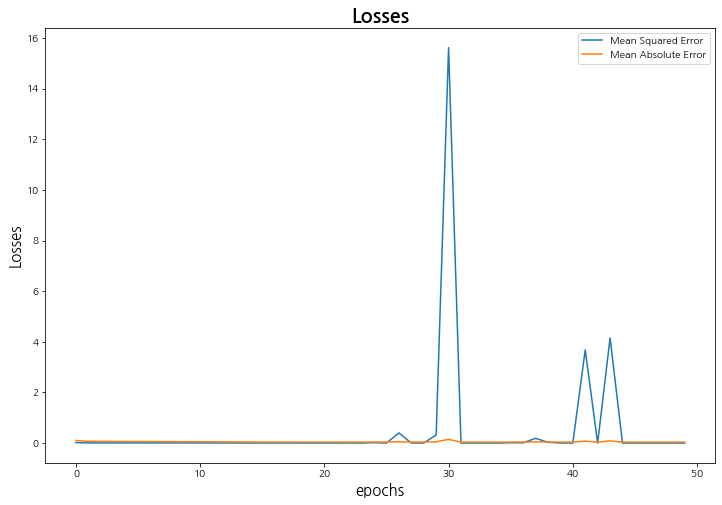

In [39]:
fig, axe = plt.subplots(figsize = (12, 8))
axe.plot(h.history['loss'])
axe.plot(h.history['mae'])
axe.legend(['Mean Squared Error', 'Mean Absolute Error'])
axe.set_title('Losses', size = 20, weight = 'bold')
axe.set_xlabel('epochs', size = 15)
axe.set_ylabel('Losses', size = 15)

In [40]:
test_data = scaled_data[train_size - time_step:, :]

x_test = []
y_test = []

for i in range(time_step, len(test_data)):
    #print(time_step, i)
    x_test.append(test_data[i-time_step:i, 0:n_col])
    y_test.append(test_data[i, 0:n_col])
    
x_test, y_test = np.array(x_test), np.array(y_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], n_col))

x_test

array([[[0.38793103, 0.42836214],
        [0.49213551, 0.4557574 ],
        [0.3008167 , 0.35174333],
        ...,
        [0.33076225, 0.333431  ],
        [0.32410768, 0.31526516],
        [0.42301875, 0.4890126 ]],

       [[0.49213551, 0.4557574 ],
        [0.3008167 , 0.35174333],
        [0.1991833 , 0.19425725],
        ...,
        [0.32410768, 0.31526516],
        [0.42301875, 0.4890126 ],
        [0.53962492, 0.58804571]],

       [[0.3008167 , 0.35174333],
        [0.1991833 , 0.19425725],
        [0.21279492, 0.21432757],
        ...,
        [0.42301875, 0.4890126 ],
        [0.53962492, 0.58804571],
        [0.38430127, 0.38397304]],

       ...,

       [[0.77208106, 0.77234105],
        [0.77283727, 0.77658951],
        [0.82320024, 0.8448579 ],
        ...,
        [0.82879613, 0.76574861],
        [0.8892922 , 0.86082625],
        [0.88006655, 0.84339291]],

       [[0.77283727, 0.77658951],
        [0.82320024, 0.8448579 ],
        [0.84664247, 0.86595371],
        .

In [41]:
m_lstm_Adam.evaluate(x_test, y_test)

154/154 [==============================] - 2s 12ms/step - loss: 0.0029 - mae: 0.0396


[0.0029457162600010633, 0.039615120738744736]

In [42]:
pred = m_lstm_Adam.predict(x_test)
pred

154/154 [==============================] - 2s 12ms/step


array([[0.5195771 , 0.5474354 ],
       [0.566323  , 0.59372365],
       [0.39621183, 0.4105945 ],
       ...,
       [0.8833374 , 0.86228776],
       [0.91363186, 0.89185214],
       [0.92205596, 0.89827657]], dtype=float32)

In [43]:
pred.shape

(4897, 2)

In [44]:
pred = scaler.inverse_transform(pred)
print(pred.shape)
pred

(4897, 2)


array([[10.965273 , 16.604963 ],
       [12.897047 , 18.579737 ],
       [ 5.8672037, 10.766988 ],
       ...,
       [25.997667 , 30.037352 ],
       [27.249586 , 31.298643 ],
       [27.597712 , 31.572725 ]], dtype=float32)

In [45]:
y_test = scaler.inverse_transform(y_test)
y_test

array([[11.79375, 18.3375 ],
       [ 5.375  ,  9.63125],
       [ 5.3625 ,  8.70625],
       ...,
       [26.8875 , 31.00625],
       [27.4    , 31.6625 ],
       [27.2375 , 31.2125 ]])

In [46]:
pred = pd.DataFrame(pred)
y_test = pd.DataFrame(y_test)

In [47]:
#pred.columns = ['예측평균기온', '예측최고기온', '예측최저기온']
#y_test.columns = ['실제평균기온', '실제최고기온', '실제최저기온']

pred.columns = ['예측평균기온', '예측최고기온']
y_test.columns = ['실제평균기온', '실제최고기온']

In [48]:
df_pred = pd.concat((pred, y_test), axis = 1)
#df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온', '예측최저기온', '실제최저기온']]
df_pred = df_pred[['예측평균기온', '실제평균기온', '예측최고기온', '실제최고기온']]
df_pred

,예측평균기온,실제평균기온,예측최고기온,실제최고기온
0,10.965273,11.79375,16.604963,18.33750
1,12.897047,5.37500,18.579737,9.63125
2,5.867204,5.36250,10.766988,8.70625
3,6.992525,7.25625,12.094462,11.08125
4,8.719009,8.90625,14.050489,12.89375
...,...,...,...,...
4892,24.966284,26.24375,28.474653,29.97500
4893,26.994240,25.86250,31.251726,29.23125
4894,25.997667,26.88750,30.037352,31.00625
4895,27.249586,27.40000,31.298643,31.66250


Text(0.5, 1.0, '예측 평균 기온')

/usr/lib/python3/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
/usr/lib/python3/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


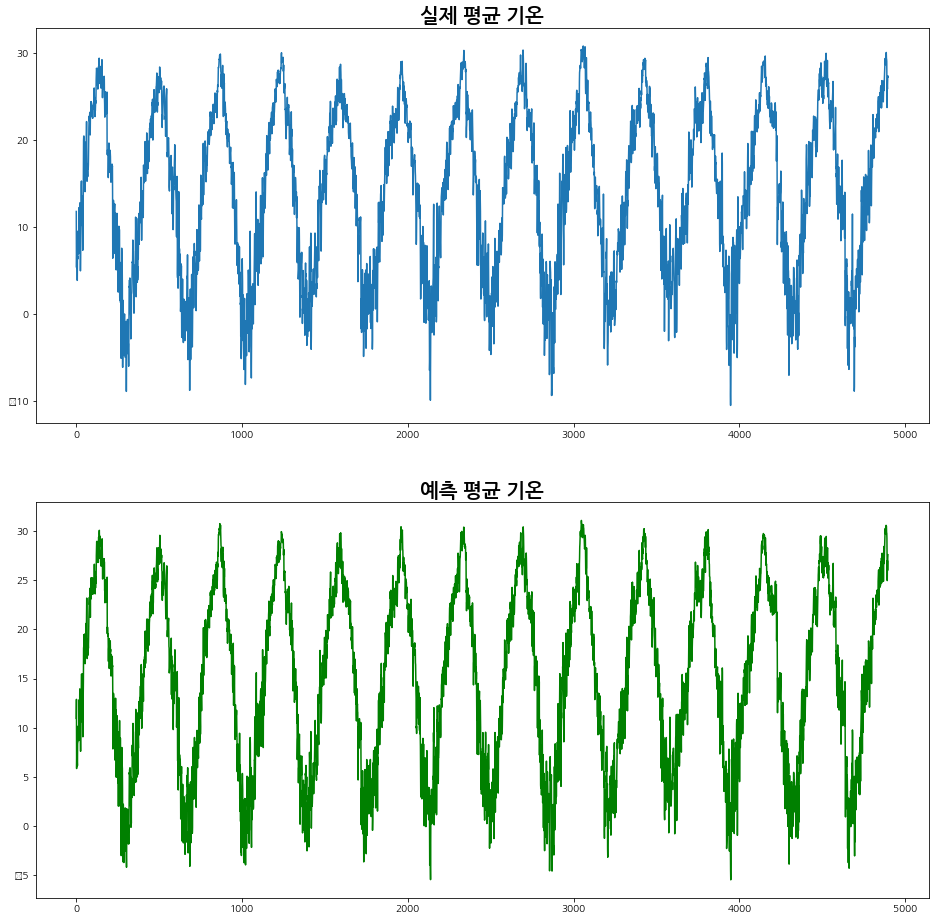

In [49]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제평균기온'])
axe[1].plot(df_pred['예측평균기온'], c = 'g')

axe[0].set_title('실제 평균 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 평균 기온', size = 20, weight = 'bold')
#axe.legend(['actual', 'predict'])

Text(0.5, 1.0, '예측 최고 기온')

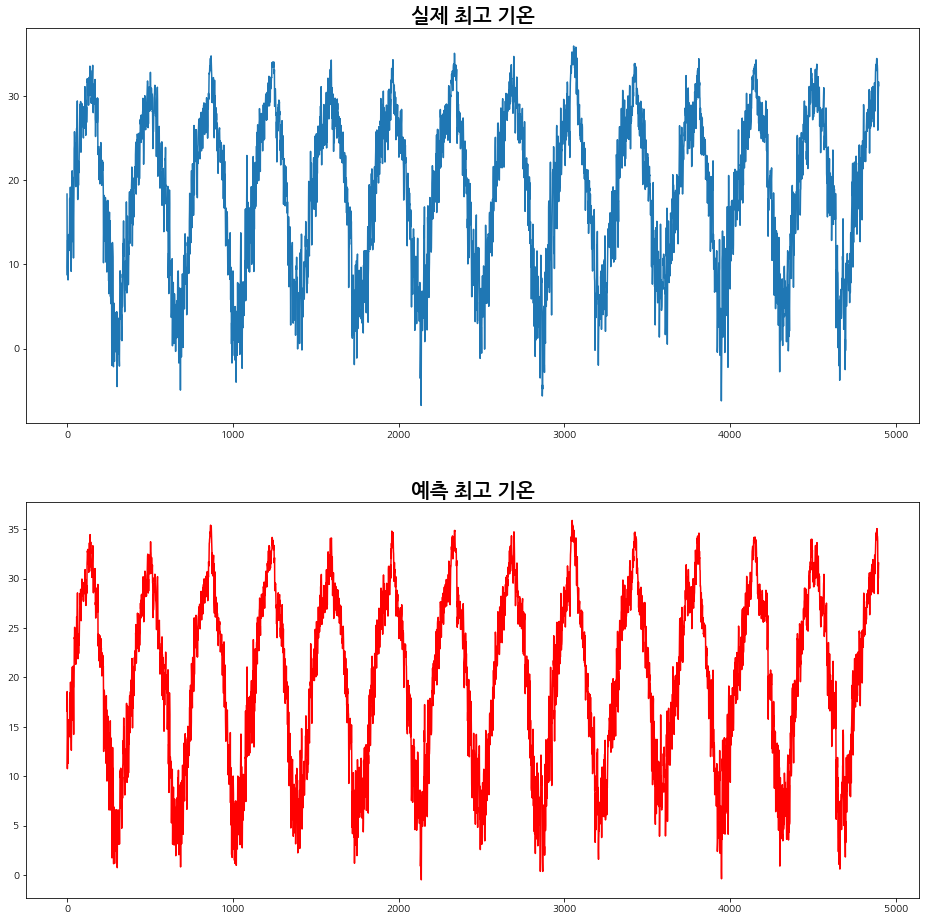

In [50]:
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최고기온'])
axe[1].plot(df_pred['예측최고기온'], c = 'r')

axe[0].set_title('실제 최고 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최고 기온', size = 20, weight = 'bold')

#axe.legend(['actual', 'predict'])

In [46]:
"""
fig, axe = plt.subplots(2,1, figsize = (16, 16))
axe[0].plot(df_pred['실제최저기온'])
axe[1].plot(df_pred['예측최저기온'], c = 'b')

axe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')
axe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')
"""

"\nfig, axe = plt.subplots(2,1, figsize = (16, 16))\naxe[0].plot(df_pred['실제최저기온'])\naxe[1].plot(df_pred['예측최저기온'], c = 'b')\n\naxe[0].set_title('실제 최저 기온', size = 20, weight = 'bold')\naxe[1].set_title('예측 최저 기온', size = 20, weight = 'bold')\n"

In [52]:
start_date = datetime.date(2023, 8, 16)
#print('언제의 대한민국 평균 기온을 알고 싶으신가요? (Ex. 2040-01-01, 형태로 적어주세요)')
year, month, day = map(int, input().split('-'))
target_date = datetime.date(year, month, day)

d_day = (target_date - start_date).days
print(d_day)

2025-08-15
730


In [53]:
list(x_test[-1][0])

[0.8232002419842709, 0.8448578962789335]

In [54]:
last_array = []
for i in range(len(x_test[-1])):
    last_array.append(list(x_test[-1][i]))
len(last_array)
np.array(last_array)

array([[0.82320024, 0.8448579 ],
       [0.84664247, 0.86595371],
       [0.85012099, 0.86346323],
       [0.85904416, 0.87884559],
       [0.81261343, 0.77981248],
       [0.76149425, 0.70216818],
       [0.80490018, 0.7890419 ],
       [0.82698125, 0.82127161],
       [0.8399879 , 0.84207442],
       [0.84497883, 0.83899795],
       [0.83514822, 0.77131556],
       [0.87008469, 0.84837386],
       [0.84694495, 0.81380018],
       [0.85344828, 0.78757691],
       [0.82879613, 0.777322  ],
       [0.86358137, 0.85701729],
       [0.88384755, 0.87503662],
       [0.888536  , 0.87283914],
       [0.85269208, 0.7998828 ],
       [0.87265578, 0.8444184 ],
       [0.88944344, 0.88397304],
       [0.82758621, 0.7998828 ],
       [0.83064126, 0.80706124],
       [0.87341198, 0.83621447],
       [0.90381125, 0.88734251],
       [0.85949788, 0.81292118],
       [0.88732607, 0.85833577],
       [0.87855414, 0.79475535],
       [0.87068966, 0.7884559 ],
       [0.87114338, 0.7998828 ],
       [0.

In [55]:
for i in range(time_step, d_day):
    print(time_step, i)
    last_ar = np.array(last_array)[i-time_step:i, 0:n_col]
    print(last_ar)
    array = np.reshape(last_ar, (1, last_ar.shape[0], n_col))
    print(array.shape)
    last_array.append(list(m_lstm_Adam.predict(array)[0]))
    print(len(last_array))

60 60
[[0.82320024 0.8448579 ]
 [0.84664247 0.86595371]
 [0.85012099 0.86346323]
 [0.85904416 0.87884559]
 [0.81261343 0.77981248]
 [0.76149425 0.70216818]
 [0.80490018 0.7890419 ]
 [0.82698125 0.82127161]
 [0.8399879  0.84207442]
 [0.84497883 0.83899795]
 [0.83514822 0.77131556]
 [0.87008469 0.84837386]
 [0.84694495 0.81380018]
 [0.85344828 0.78757691]
 [0.82879613 0.777322  ]
 [0.86358137 0.85701729]
 [0.88384755 0.87503662]
 [0.888536   0.87283914]
 [0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.8740

1/1 [==============================] - 0s 23ms/step
66
60 66
[[0.80490018 0.7890419 ]
 [0.82698125 0.82127161]
 [0.8399879  0.84207442]
 [0.84497883 0.83899795]
 [0.83514822 0.77131556]
 [0.87008469 0.84837386]
 [0.84694495 0.81380018]
 [0.85344828 0.78757691]
 [0.82879613 0.777322  ]
 [0.86358137 0.85701729]
 [0.88384755 0.87503662]
 [0.888536   0.87283914]
 [0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0

1/1 [==============================] - 0s 25ms/step
72
60 72
[[0.84694495 0.81380018]
 [0.85344828 0.78757691]
 [0.82879613 0.777322  ]
 [0.86358137 0.85701729]
 [0.88384755 0.87503662]
 [0.888536   0.87283914]
 [0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0

1/1 [==============================] - 0s 18ms/step
78
60 78
[[0.85269208 0.7998828 ]
 [0.87265578 0.8444184 ]
 [0.88944344 0.88397304]
 [0.82758621 0.7998828 ]
 [0.83064126 0.80706124]
 [0.87341198 0.83621447]
 [0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0

1/1 [==============================] - 0s 18ms/step
84
60 84
[[0.90381125 0.88734251]
 [0.85949788 0.81292118]
 [0.88732607 0.85833577]
 [0.87855414 0.79475535]
 [0.87068966 0.7884559 ]
 [0.87114338 0.7998828 ]
 [0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.92205596 0.89827657]
 [0.92440021 0

1/1 [==============================] - 0s 16ms/step
90
60 90
[[0.84951603 0.79856431]
 [0.88551119 0.86214474]
 [0.84467635 0.77527102]
 [0.86584997 0.84192792]
 [0.88067151 0.86170524]
 [0.90229885 0.89774392]
 [0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.92205596 0.89827657]
 [0.92440021 0.89847517]
 [0.92583752 0.90000379]
 [0.9260844  0.90025806]
 [0.92513806 0.89934993]
 [0.92297792 0.89706194]
 [0.92003369 0.89378011]
 [0.91545564 0

1/1 [==============================] - 0s 20ms/step
96
60 96
[[0.87598306 0.84060943]
 [0.88808227 0.81878113]
 [0.89337568 0.86199824]
 [0.90804598 0.87401113]
 [0.92075015 0.90301787]
 [0.93965517 0.92719016]
 [0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.92205596 0.89827657]
 [0.92440021 0.89847517]
 [0.92583752 0.90000379]
 [0.9260844  0.90025806]
 [0.92513806 0.89934993]
 [0.92297792 0.89706194]
 [0.92003369 0.89378011]
 [0.91545564 0.8886627 ]
 [0.90992951 0.88247752]
 [0.90393984 0.87574923]
 [0.8977282  0.86867702]
 [0.89146531 0.86153972]
 [0.88449985 0.85371065]
 [0.87747049 0

1/1 [==============================] - 0s 20ms/step
102
60 102
[[0.95447671 0.93788456]
 [0.96521476 0.94828597]
 [0.95251059 0.94696748]
 [0.94797338 0.93173161]
 [0.96264368 0.95077644]
 [0.9661222  0.95150894]
 [0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.92205596 0.89827657]
 [0.92440021 0.89847517]
 [0.92583752 0.90000379]
 [0.9260844  0.90025806]
 [0.92513806 0.89934993]
 [0.92297792 0.89706194]
 [0.92003369 0.89378011]
 [0.91545564 0.8886627 ]
 [0.90992951 0.88247752]
 [0.90393984 0.87574923]
 [0.8977282  0.86867702]
 [0.89146531 0.86153972]
 [0.88449985 0.85371065]
 [0.87747049 0.84576309]
 [0.87109137 0.83844614]
 [0.86503077 0.83207214]
 [0.85880339 0.82602203]
 [0.85283458 0.82025707]
 [0.84692788 0.81517184]
 [0.84145617

1/1 [==============================] - 0s 23ms/step
108
60 108
[[0.97595281 0.96513331]
 [0.9807925  0.96498682]
 [0.98200242 0.96501611]
 [0.96581972 0.94813947]
 [0.96294616 0.94638148]
 [0.95795523 0.93451509]
 [0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.92205596 0.89827657]
 [0.92440021 0.89847517]
 [0.92583752 0.90000379]
 [0.9260844  0.90025806]
 [0.92513806 0.89934993]
 [0.92297792 0.89706194]
 [0.92003369 0.89378011]
 [0.91545564 0.8886627 ]
 [0.90992951 0.88247752]
 [0.90393984 0.87574923]
 [0.8977282  0.86867702]
 [0.89146531 0.86153972]
 [0.88449985 0.85371065]
 [0.87747049 0.84576309]
 [0.87109137 0.83844614]
 [0.86503077 0.83207214]
 [0.85880339 0.82602203]
 [0.85283458 0.82025707]
 [0.84692788 0.81517184]
 [0.84145617 0.81074452]
 [0.83624285 0.80658698]
 [0.83106565 0.8028872 ]
 [0.82605803 0.80016196]
 [0.82160902 0.79784334]
 [0.81727809 0.79595733]
 [0.81306159

1/1 [==============================] - 0s 20ms/step
114
60 114
[[0.89503932 0.83709347]
 [0.82879613 0.76574861]
 [0.8892922  0.86082625]
 [0.88006655 0.84339291]
 [0.90486993 0.88499854]
 [0.91727163 0.9003809 ]
 [0.92205596 0.89827657]
 [0.92440021 0.89847517]
 [0.92583752 0.90000379]
 [0.9260844  0.90025806]
 [0.92513806 0.89934993]
 [0.92297792 0.89706194]
 [0.92003369 0.89378011]
 [0.91545564 0.8886627 ]
 [0.90992951 0.88247752]
 [0.90393984 0.87574923]
 [0.8977282  0.86867702]
 [0.89146531 0.86153972]
 [0.88449985 0.85371065]
 [0.87747049 0.84576309]
 [0.87109137 0.83844614]
 [0.86503077 0.83207214]
 [0.85880339 0.82602203]
 [0.85283458 0.82025707]
 [0.84692788 0.81517184]
 [0.84145617 0.81074452]
 [0.83624285 0.80658698]
 [0.83106565 0.8028872 ]
 [0.82605803 0.80016196]
 [0.82160902 0.79784334]
 [0.81727809 0.79595733]
 [0.81306159 0.79391551]
 [0.80922163 0.79183972]
 [0.80585641 0.78969216]
 [0.80310649 0.78779936]
 [0.80076694 0.78627932]
 [0.79878223 0.7850256 ]
 [0.79724616

1/1 [==============================] - 0s 17ms/step
120
60 120
[[0.92205596 0.89827657]
 [0.92440021 0.89847517]
 [0.92583752 0.90000379]
 [0.9260844  0.90025806]
 [0.92513806 0.89934993]
 [0.92297792 0.89706194]
 [0.92003369 0.89378011]
 [0.91545564 0.8886627 ]
 [0.90992951 0.88247752]
 [0.90393984 0.87574923]
 [0.8977282  0.86867702]
 [0.89146531 0.86153972]
 [0.88449985 0.85371065]
 [0.87747049 0.84576309]
 [0.87109137 0.83844614]
 [0.86503077 0.83207214]
 [0.85880339 0.82602203]
 [0.85283458 0.82025707]
 [0.84692788 0.81517184]
 [0.84145617 0.81074452]
 [0.83624285 0.80658698]
 [0.83106565 0.8028872 ]
 [0.82605803 0.80016196]
 [0.82160902 0.79784334]
 [0.81727809 0.79595733]
 [0.81306159 0.79391551]
 [0.80922163 0.79183972]
 [0.80585641 0.78969216]
 [0.80310649 0.78779936]
 [0.80076694 0.78627932]
 [0.79878223 0.7850256 ]
 [0.79724616 0.78404176]
 [0.79566771 0.78309476]
 [0.79444164 0.78232276]
 [0.79332626 0.78165507]
 [0.79222065 0.78096282]
 [0.79116839 0.78025424]
 [0.7902804 

1/1 [==============================] - 0s 19ms/step
126
60 126
[[0.92003369 0.89378011]
 [0.91545564 0.8886627 ]
 [0.90992951 0.88247752]
 [0.90393984 0.87574923]
 [0.8977282  0.86867702]
 [0.89146531 0.86153972]
 [0.88449985 0.85371065]
 [0.87747049 0.84576309]
 [0.87109137 0.83844614]
 [0.86503077 0.83207214]
 [0.85880339 0.82602203]
 [0.85283458 0.82025707]
 [0.84692788 0.81517184]
 [0.84145617 0.81074452]
 [0.83624285 0.80658698]
 [0.83106565 0.8028872 ]
 [0.82605803 0.80016196]
 [0.82160902 0.79784334]
 [0.81727809 0.79595733]
 [0.81306159 0.79391551]
 [0.80922163 0.79183972]
 [0.80585641 0.78969216]
 [0.80310649 0.78779936]
 [0.80076694 0.78627932]
 [0.79878223 0.7850256 ]
 [0.79724616 0.78404176]
 [0.79566771 0.78309476]
 [0.79444164 0.78232276]
 [0.79332626 0.78165507]
 [0.79222065 0.78096282]
 [0.79116839 0.78025424]
 [0.7902804  0.77959597]
 [0.78966331 0.77912676]
 [0.78931516 0.77885866]
 [0.78915828 0.77869284]
 [0.78906453 0.77848935]
 [0.78922129 0.77849066]
 [0.78975123

1/1 [==============================] - 0s 19ms/step
132
60 132
[[0.88449985 0.85371065]
 [0.87747049 0.84576309]
 [0.87109137 0.83844614]
 [0.86503077 0.83207214]
 [0.85880339 0.82602203]
 [0.85283458 0.82025707]
 [0.84692788 0.81517184]
 [0.84145617 0.81074452]
 [0.83624285 0.80658698]
 [0.83106565 0.8028872 ]
 [0.82605803 0.80016196]
 [0.82160902 0.79784334]
 [0.81727809 0.79595733]
 [0.81306159 0.79391551]
 [0.80922163 0.79183972]
 [0.80585641 0.78969216]
 [0.80310649 0.78779936]
 [0.80076694 0.78627932]
 [0.79878223 0.7850256 ]
 [0.79724616 0.78404176]
 [0.79566771 0.78309476]
 [0.79444164 0.78232276]
 [0.79332626 0.78165507]
 [0.79222065 0.78096282]
 [0.79116839 0.78025424]
 [0.7902804  0.77959597]
 [0.78966331 0.77912676]
 [0.78931516 0.77885866]
 [0.78915828 0.77869284]
 [0.78906453 0.77848935]
 [0.78922129 0.77849066]
 [0.78975123 0.77877879]
 [0.79075241 0.77945948]
 [0.79220742 0.78048277]
 [0.79427671 0.78195989]
 [0.79684037 0.78391683]
 [0.799703   0.78612626]
 [0.80266464

1/1 [==============================] - 0s 19ms/step
138
60 138
[[0.84692788 0.81517184]
 [0.84145617 0.81074452]
 [0.83624285 0.80658698]
 [0.83106565 0.8028872 ]
 [0.82605803 0.80016196]
 [0.82160902 0.79784334]
 [0.81727809 0.79595733]
 [0.81306159 0.79391551]
 [0.80922163 0.79183972]
 [0.80585641 0.78969216]
 [0.80310649 0.78779936]
 [0.80076694 0.78627932]
 [0.79878223 0.7850256 ]
 [0.79724616 0.78404176]
 [0.79566771 0.78309476]
 [0.79444164 0.78232276]
 [0.79332626 0.78165507]
 [0.79222065 0.78096282]
 [0.79116839 0.78025424]
 [0.7902804  0.77959597]
 [0.78966331 0.77912676]
 [0.78931516 0.77885866]
 [0.78915828 0.77869284]
 [0.78906453 0.77848935]
 [0.78922129 0.77849066]
 [0.78975123 0.77877879]
 [0.79075241 0.77945948]
 [0.79220742 0.78048277]
 [0.79427671 0.78195989]
 [0.79684037 0.78391683]
 [0.799703   0.78612626]
 [0.80266464 0.7884804 ]
 [0.805718   0.79092777]
 [0.80907553 0.7935499 ]
 [0.81291449 0.79646027]
 [0.81728733 0.79976678]
 [0.82204372 0.80341589]
 [0.82823503

1/1 [==============================] - 0s 22ms/step
144
60 144
[[0.81727809 0.79595733]
 [0.81306159 0.79391551]
 [0.80922163 0.79183972]
 [0.80585641 0.78969216]
 [0.80310649 0.78779936]
 [0.80076694 0.78627932]
 [0.79878223 0.7850256 ]
 [0.79724616 0.78404176]
 [0.79566771 0.78309476]
 [0.79444164 0.78232276]
 [0.79332626 0.78165507]
 [0.79222065 0.78096282]
 [0.79116839 0.78025424]
 [0.7902804  0.77959597]
 [0.78966331 0.77912676]
 [0.78931516 0.77885866]
 [0.78915828 0.77869284]
 [0.78906453 0.77848935]
 [0.78922129 0.77849066]
 [0.78975123 0.77877879]
 [0.79075241 0.77945948]
 [0.79220742 0.78048277]
 [0.79427671 0.78195989]
 [0.79684037 0.78391683]
 [0.799703   0.78612626]
 [0.80266464 0.7884804 ]
 [0.805718   0.79092777]
 [0.80907553 0.7935499 ]
 [0.81291449 0.79646027]
 [0.81728733 0.79976678]
 [0.82204372 0.80341589]
 [0.82823503 0.80778444]
 [0.83616412 0.81343269]
 [0.84563023 0.82050312]
 [0.85755438 0.82975996]
 [0.8719486  0.84116149]
 [0.88826466 0.85422349]
 [0.90662515

1/1 [==============================] - 0s 21ms/step
150
60 150
[[0.79878223 0.7850256 ]
 [0.79724616 0.78404176]
 [0.79566771 0.78309476]
 [0.79444164 0.78232276]
 [0.79332626 0.78165507]
 [0.79222065 0.78096282]
 [0.79116839 0.78025424]
 [0.7902804  0.77959597]
 [0.78966331 0.77912676]
 [0.78931516 0.77885866]
 [0.78915828 0.77869284]
 [0.78906453 0.77848935]
 [0.78922129 0.77849066]
 [0.78975123 0.77877879]
 [0.79075241 0.77945948]
 [0.79220742 0.78048277]
 [0.79427671 0.78195989]
 [0.79684037 0.78391683]
 [0.799703   0.78612626]
 [0.80266464 0.7884804 ]
 [0.805718   0.79092777]
 [0.80907553 0.7935499 ]
 [0.81291449 0.79646027]
 [0.81728733 0.79976678]
 [0.82204372 0.80341589]
 [0.82823503 0.80778444]
 [0.83616412 0.81343269]
 [0.84563023 0.82050312]
 [0.85755438 0.82975996]
 [0.8719486  0.84116149]
 [0.88826466 0.85422349]
 [0.90662515 0.86922705]
 [0.9256413  0.88733554]
 [0.94641703 0.90723538]
 [0.96808106 0.92951477]
 [0.989784   0.95353103]
 [1.01155758 0.97971261]
 [1.03311396

1/1 [==============================] - 0s 18ms/step
156
60 156
[[0.79116839 0.78025424]
 [0.7902804  0.77959597]
 [0.78966331 0.77912676]
 [0.78931516 0.77885866]
 [0.78915828 0.77869284]
 [0.78906453 0.77848935]
 [0.78922129 0.77849066]
 [0.78975123 0.77877879]
 [0.79075241 0.77945948]
 [0.79220742 0.78048277]
 [0.79427671 0.78195989]
 [0.79684037 0.78391683]
 [0.799703   0.78612626]
 [0.80266464 0.7884804 ]
 [0.805718   0.79092777]
 [0.80907553 0.7935499 ]
 [0.81291449 0.79646027]
 [0.81728733 0.79976678]
 [0.82204372 0.80341589]
 [0.82823503 0.80778444]
 [0.83616412 0.81343269]
 [0.84563023 0.82050312]
 [0.85755438 0.82975996]
 [0.8719486  0.84116149]
 [0.88826466 0.85422349]
 [0.90662515 0.86922705]
 [0.9256413  0.88733554]
 [0.94641703 0.90723538]
 [0.96808106 0.92951477]
 [0.989784   0.95353103]
 [1.01155758 0.97971261]
 [1.03311396 1.00766063]
 [1.05382359 1.03590274]
 [1.07214892 1.06290674]
 [1.08687973 1.08744073]
 [1.0974369  1.1080879 ]
 [1.10527837 1.12241268]
 [1.110605  

1/1 [==============================] - 0s 18ms/step
162
60 162
[[0.78922129 0.77849066]
 [0.78975123 0.77877879]
 [0.79075241 0.77945948]
 [0.79220742 0.78048277]
 [0.79427671 0.78195989]
 [0.79684037 0.78391683]
 [0.799703   0.78612626]
 [0.80266464 0.7884804 ]
 [0.805718   0.79092777]
 [0.80907553 0.7935499 ]
 [0.81291449 0.79646027]
 [0.81728733 0.79976678]
 [0.82204372 0.80341589]
 [0.82823503 0.80778444]
 [0.83616412 0.81343269]
 [0.84563023 0.82050312]
 [0.85755438 0.82975996]
 [0.8719486  0.84116149]
 [0.88826466 0.85422349]
 [0.90662515 0.86922705]
 [0.9256413  0.88733554]
 [0.94641703 0.90723538]
 [0.96808106 0.92951477]
 [0.989784   0.95353103]
 [1.01155758 0.97971261]
 [1.03311396 1.00766063]
 [1.05382359 1.03590274]
 [1.07214892 1.06290674]
 [1.08687973 1.08744073]
 [1.0974369  1.1080879 ]
 [1.10527837 1.12241268]
 [1.110605   1.12781703]
 [1.10495126 1.13427806]
 [1.09177148 1.14014554]
 [1.07416904 1.1405381 ]
 [1.06724823 1.12478697]
 [1.06251538 1.09002459]
 [1.05266953

1/1 [==============================] - 0s 20ms/step
168
60 168
[[0.799703   0.78612626]
 [0.80266464 0.7884804 ]
 [0.805718   0.79092777]
 [0.80907553 0.7935499 ]
 [0.81291449 0.79646027]
 [0.81728733 0.79976678]
 [0.82204372 0.80341589]
 [0.82823503 0.80778444]
 [0.83616412 0.81343269]
 [0.84563023 0.82050312]
 [0.85755438 0.82975996]
 [0.8719486  0.84116149]
 [0.88826466 0.85422349]
 [0.90662515 0.86922705]
 [0.9256413  0.88733554]
 [0.94641703 0.90723538]
 [0.96808106 0.92951477]
 [0.989784   0.95353103]
 [1.01155758 0.97971261]
 [1.03311396 1.00766063]
 [1.05382359 1.03590274]
 [1.07214892 1.06290674]
 [1.08687973 1.08744073]
 [1.0974369  1.1080879 ]
 [1.10527837 1.12241268]
 [1.110605   1.12781703]
 [1.10495126 1.13427806]
 [1.09177148 1.14014554]
 [1.07416904 1.1405381 ]
 [1.06724823 1.12478697]
 [1.06251538 1.09002459]
 [1.05266953 1.04471147]
 [1.03984797 0.99759865]
 [1.02461922 0.94632494]
 [1.00380301 0.88827741]
 [0.95403075 0.82439196]
 [0.87697428 0.79714239]
 [0.81420493

1/1 [==============================] - 0s 19ms/step
174
60 174
[[0.82204372 0.80341589]
 [0.82823503 0.80778444]
 [0.83616412 0.81343269]
 [0.84563023 0.82050312]
 [0.85755438 0.82975996]
 [0.8719486  0.84116149]
 [0.88826466 0.85422349]
 [0.90662515 0.86922705]
 [0.9256413  0.88733554]
 [0.94641703 0.90723538]
 [0.96808106 0.92951477]
 [0.989784   0.95353103]
 [1.01155758 0.97971261]
 [1.03311396 1.00766063]
 [1.05382359 1.03590274]
 [1.07214892 1.06290674]
 [1.08687973 1.08744073]
 [1.0974369  1.1080879 ]
 [1.10527837 1.12241268]
 [1.110605   1.12781703]
 [1.10495126 1.13427806]
 [1.09177148 1.14014554]
 [1.07416904 1.1405381 ]
 [1.06724823 1.12478697]
 [1.06251538 1.09002459]
 [1.05266953 1.04471147]
 [1.03984797 0.99759865]
 [1.02461922 0.94632494]
 [1.00380301 0.88827741]
 [0.95403075 0.82439196]
 [0.87697428 0.79714239]
 [0.81420493 0.77020979]
 [0.77642256 0.74590647]
 [0.75706047 0.72233319]
 [0.7465409  0.69279337]
 [0.74791175 0.66511869]
 [0.76989144 0.65285301]
 [0.7837649 

1/1 [==============================] - 0s 20ms/step
180
60 180
[[0.88826466 0.85422349]
 [0.90662515 0.86922705]
 [0.9256413  0.88733554]
 [0.94641703 0.90723538]
 [0.96808106 0.92951477]
 [0.989784   0.95353103]
 [1.01155758 0.97971261]
 [1.03311396 1.00766063]
 [1.05382359 1.03590274]
 [1.07214892 1.06290674]
 [1.08687973 1.08744073]
 [1.0974369  1.1080879 ]
 [1.10527837 1.12241268]
 [1.110605   1.12781703]
 [1.10495126 1.13427806]
 [1.09177148 1.14014554]
 [1.07416904 1.1405381 ]
 [1.06724823 1.12478697]
 [1.06251538 1.09002459]
 [1.05266953 1.04471147]
 [1.03984797 0.99759865]
 [1.02461922 0.94632494]
 [1.00380301 0.88827741]
 [0.95403075 0.82439196]
 [0.87697428 0.79714239]
 [0.81420493 0.77020979]
 [0.77642256 0.74590647]
 [0.75706047 0.72233319]
 [0.7465409  0.69279337]
 [0.74791175 0.66511869]
 [0.76989144 0.65285301]
 [0.7837649  0.68349648]
 [0.80463725 0.72877252]
 [0.82137275 0.76115906]
 [0.8218711  0.77721334]
 [0.81633526 0.78238404]
 [0.81437027 0.78019261]
 [0.81274092

1/1 [==============================] - 0s 18ms/step
186
60 186
[[1.01155758 0.97971261]
 [1.03311396 1.00766063]
 [1.05382359 1.03590274]
 [1.07214892 1.06290674]
 [1.08687973 1.08744073]
 [1.0974369  1.1080879 ]
 [1.10527837 1.12241268]
 [1.110605   1.12781703]
 [1.10495126 1.13427806]
 [1.09177148 1.14014554]
 [1.07416904 1.1405381 ]
 [1.06724823 1.12478697]
 [1.06251538 1.09002459]
 [1.05266953 1.04471147]
 [1.03984797 0.99759865]
 [1.02461922 0.94632494]
 [1.00380301 0.88827741]
 [0.95403075 0.82439196]
 [0.87697428 0.79714239]
 [0.81420493 0.77020979]
 [0.77642256 0.74590647]
 [0.75706047 0.72233319]
 [0.7465409  0.69279337]
 [0.74791175 0.66511869]
 [0.76989144 0.65285301]
 [0.7837649  0.68349648]
 [0.80463725 0.72877252]
 [0.82137275 0.76115906]
 [0.8218711  0.77721334]
 [0.81633526 0.78238404]
 [0.81437027 0.78019261]
 [0.81274092 0.7767849 ]
 [0.80731571 0.77489793]
 [0.80148119 0.77481723]
 [0.79656947 0.77481258]
 [0.79264885 0.77466333]
 [0.78953952 0.77447701]
 [0.78692842

1/1 [==============================] - 0s 18ms/step
192
60 192
[[1.10527837 1.12241268]
 [1.110605   1.12781703]
 [1.10495126 1.13427806]
 [1.09177148 1.14014554]
 [1.07416904 1.1405381 ]
 [1.06724823 1.12478697]
 [1.06251538 1.09002459]
 [1.05266953 1.04471147]
 [1.03984797 0.99759865]
 [1.02461922 0.94632494]
 [1.00380301 0.88827741]
 [0.95403075 0.82439196]
 [0.87697428 0.79714239]
 [0.81420493 0.77020979]
 [0.77642256 0.74590647]
 [0.75706047 0.72233319]
 [0.7465409  0.69279337]
 [0.74791175 0.66511869]
 [0.76989144 0.65285301]
 [0.7837649  0.68349648]
 [0.80463725 0.72877252]
 [0.82137275 0.76115906]
 [0.8218711  0.77721334]
 [0.81633526 0.78238404]
 [0.81437027 0.78019261]
 [0.81274092 0.7767849 ]
 [0.80731571 0.77489793]
 [0.80148119 0.77481723]
 [0.79656947 0.77481258]
 [0.79264885 0.77466333]
 [0.78953952 0.77447701]
 [0.78692842 0.7743578 ]
 [0.78435481 0.77388465]
 [0.78180134 0.77313519]
 [0.7796995  0.77204585]
 [0.77793616 0.770805  ]
 [0.77627915 0.7695936 ]
 [0.77476132

1/1 [==============================] - 0s 25ms/step
198
60 198
[[1.06251538 1.09002459]
 [1.05266953 1.04471147]
 [1.03984797 0.99759865]
 [1.02461922 0.94632494]
 [1.00380301 0.88827741]
 [0.95403075 0.82439196]
 [0.87697428 0.79714239]
 [0.81420493 0.77020979]
 [0.77642256 0.74590647]
 [0.75706047 0.72233319]
 [0.7465409  0.69279337]
 [0.74791175 0.66511869]
 [0.76989144 0.65285301]
 [0.7837649  0.68349648]
 [0.80463725 0.72877252]
 [0.82137275 0.76115906]
 [0.8218711  0.77721334]
 [0.81633526 0.78238404]
 [0.81437027 0.78019261]
 [0.81274092 0.7767849 ]
 [0.80731571 0.77489793]
 [0.80148119 0.77481723]
 [0.79656947 0.77481258]
 [0.79264885 0.77466333]
 [0.78953952 0.77447701]
 [0.78692842 0.7743578 ]
 [0.78435481 0.77388465]
 [0.78180134 0.77313519]
 [0.7796995  0.77204585]
 [0.77793616 0.770805  ]
 [0.77627915 0.7695936 ]
 [0.77476132 0.76838279]
 [0.77327704 0.76724422]
 [0.77162385 0.7660203 ]
 [0.76991636 0.76464117]
 [0.76824206 0.76318049]
 [0.7666235  0.76175344]
 [0.76504123

1/1 [==============================] - 0s 22ms/step
204
60 204
[[0.87697428 0.79714239]
 [0.81420493 0.77020979]
 [0.77642256 0.74590647]
 [0.75706047 0.72233319]
 [0.7465409  0.69279337]
 [0.74791175 0.66511869]
 [0.76989144 0.65285301]
 [0.7837649  0.68349648]
 [0.80463725 0.72877252]
 [0.82137275 0.76115906]
 [0.8218711  0.77721334]
 [0.81633526 0.78238404]
 [0.81437027 0.78019261]
 [0.81274092 0.7767849 ]
 [0.80731571 0.77489793]
 [0.80148119 0.77481723]
 [0.79656947 0.77481258]
 [0.79264885 0.77466333]
 [0.78953952 0.77447701]
 [0.78692842 0.7743578 ]
 [0.78435481 0.77388465]
 [0.78180134 0.77313519]
 [0.7796995  0.77204585]
 [0.77793616 0.770805  ]
 [0.77627915 0.7695936 ]
 [0.77476132 0.76838279]
 [0.77327704 0.76724422]
 [0.77162385 0.7660203 ]
 [0.76991636 0.76464117]
 [0.76824206 0.76318049]
 [0.7666235  0.76175344]
 [0.76504123 0.76039732]
 [0.76344526 0.75911891]
 [0.76187021 0.75787997]
 [0.76067317 0.75696754]
 [0.75975525 0.75638592]
 [0.7591309  0.75608587]
 [0.75874192

1/1 [==============================] - 0s 19ms/step
210
60 210
[[0.76989144 0.65285301]
 [0.7837649  0.68349648]
 [0.80463725 0.72877252]
 [0.82137275 0.76115906]
 [0.8218711  0.77721334]
 [0.81633526 0.78238404]
 [0.81437027 0.78019261]
 [0.81274092 0.7767849 ]
 [0.80731571 0.77489793]
 [0.80148119 0.77481723]
 [0.79656947 0.77481258]
 [0.79264885 0.77466333]
 [0.78953952 0.77447701]
 [0.78692842 0.7743578 ]
 [0.78435481 0.77388465]
 [0.78180134 0.77313519]
 [0.7796995  0.77204585]
 [0.77793616 0.770805  ]
 [0.77627915 0.7695936 ]
 [0.77476132 0.76838279]
 [0.77327704 0.76724422]
 [0.77162385 0.7660203 ]
 [0.76991636 0.76464117]
 [0.76824206 0.76318049]
 [0.7666235  0.76175344]
 [0.76504123 0.76039732]
 [0.76344526 0.75911891]
 [0.76187021 0.75787997]
 [0.76067317 0.75696754]
 [0.75975525 0.75638592]
 [0.7591309  0.75608587]
 [0.75874192 0.75583994]
 [0.7581901  0.7555002 ]
 [0.75750327 0.754861  ]
 [0.75675488 0.75399327]
 [0.75583291 0.75284517]
 [0.75497597 0.75155115]
 [0.75470263

1/1 [==============================] - 0s 20ms/step
216
60 216
[[0.81437027 0.78019261]
 [0.81274092 0.7767849 ]
 [0.80731571 0.77489793]
 [0.80148119 0.77481723]
 [0.79656947 0.77481258]
 [0.79264885 0.77466333]
 [0.78953952 0.77447701]
 [0.78692842 0.7743578 ]
 [0.78435481 0.77388465]
 [0.78180134 0.77313519]
 [0.7796995  0.77204585]
 [0.77793616 0.770805  ]
 [0.77627915 0.7695936 ]
 [0.77476132 0.76838279]
 [0.77327704 0.76724422]
 [0.77162385 0.7660203 ]
 [0.76991636 0.76464117]
 [0.76824206 0.76318049]
 [0.7666235  0.76175344]
 [0.76504123 0.76039732]
 [0.76344526 0.75911891]
 [0.76187021 0.75787997]
 [0.76067317 0.75696754]
 [0.75975525 0.75638592]
 [0.7591309  0.75608587]
 [0.75874192 0.75583994]
 [0.7581901  0.7555002 ]
 [0.75750327 0.754861  ]
 [0.75675488 0.75399327]
 [0.75583291 0.75284517]
 [0.75497597 0.75155115]
 [0.75470263 0.75072563]
 [0.7553224  0.75060296]
 [0.7571758  0.751477  ]
 [0.7604335  0.7534399 ]
 [0.76562732 0.75698221]
 [0.77293205 0.76225293]
 [0.78348762

1/1 [==============================] - 0s 19ms/step
222
60 222
[[0.78953952 0.77447701]
 [0.78692842 0.7743578 ]
 [0.78435481 0.77388465]
 [0.78180134 0.77313519]
 [0.7796995  0.77204585]
 [0.77793616 0.770805  ]
 [0.77627915 0.7695936 ]
 [0.77476132 0.76838279]
 [0.77327704 0.76724422]
 [0.77162385 0.7660203 ]
 [0.76991636 0.76464117]
 [0.76824206 0.76318049]
 [0.7666235  0.76175344]
 [0.76504123 0.76039732]
 [0.76344526 0.75911891]
 [0.76187021 0.75787997]
 [0.76067317 0.75696754]
 [0.75975525 0.75638592]
 [0.7591309  0.75608587]
 [0.75874192 0.75583994]
 [0.7581901  0.7555002 ]
 [0.75750327 0.754861  ]
 [0.75675488 0.75399327]
 [0.75583291 0.75284517]
 [0.75497597 0.75155115]
 [0.75470263 0.75072563]
 [0.7553224  0.75060296]
 [0.7571758  0.751477  ]
 [0.7604335  0.7534399 ]
 [0.76562732 0.75698221]
 [0.77293205 0.76225293]
 [0.78348762 0.77054632]
 [0.79792213 0.78224051]
 [0.81616795 0.79740918]
 [0.83813035 0.81590855]
 [0.86171705 0.83567953]
 [0.88679683 0.85642219]
 [0.91347957

1/1 [==============================] - 0s 22ms/step
228
60 228
[[0.77627915 0.7695936 ]
 [0.77476132 0.76838279]
 [0.77327704 0.76724422]
 [0.77162385 0.7660203 ]
 [0.76991636 0.76464117]
 [0.76824206 0.76318049]
 [0.7666235  0.76175344]
 [0.76504123 0.76039732]
 [0.76344526 0.75911891]
 [0.76187021 0.75787997]
 [0.76067317 0.75696754]
 [0.75975525 0.75638592]
 [0.7591309  0.75608587]
 [0.75874192 0.75583994]
 [0.7581901  0.7555002 ]
 [0.75750327 0.754861  ]
 [0.75675488 0.75399327]
 [0.75583291 0.75284517]
 [0.75497597 0.75155115]
 [0.75470263 0.75072563]
 [0.7553224  0.75060296]
 [0.7571758  0.751477  ]
 [0.7604335  0.7534399 ]
 [0.76562732 0.75698221]
 [0.77293205 0.76225293]
 [0.78348762 0.77054632]
 [0.79792213 0.78224051]
 [0.81616795 0.79740918]
 [0.83813035 0.81590855]
 [0.86171705 0.83567953]
 [0.88679683 0.85642219]
 [0.91347957 0.87910032]
 [0.94119889 0.90311801]
 [0.9681499  0.92810249]
 [0.99260283 0.95362031]
 [1.0157758  0.97946143]
 [1.03802478 1.00794983]
 [1.06068945

1/1 [==============================] - 0s 18ms/step
234
60 234
[[0.7666235  0.76175344]
 [0.76504123 0.76039732]
 [0.76344526 0.75911891]
 [0.76187021 0.75787997]
 [0.76067317 0.75696754]
 [0.75975525 0.75638592]
 [0.7591309  0.75608587]
 [0.75874192 0.75583994]
 [0.7581901  0.7555002 ]
 [0.75750327 0.754861  ]
 [0.75675488 0.75399327]
 [0.75583291 0.75284517]
 [0.75497597 0.75155115]
 [0.75470263 0.75072563]
 [0.7553224  0.75060296]
 [0.7571758  0.751477  ]
 [0.7604335  0.7534399 ]
 [0.76562732 0.75698221]
 [0.77293205 0.76225293]
 [0.78348762 0.77054632]
 [0.79792213 0.78224051]
 [0.81616795 0.79740918]
 [0.83813035 0.81590855]
 [0.86171705 0.83567953]
 [0.88679683 0.85642219]
 [0.91347957 0.87910032]
 [0.94119889 0.90311801]
 [0.9681499  0.92810249]
 [0.99260283 0.95362031]
 [1.0157758  0.97946143]
 [1.03802478 1.00794983]
 [1.06068945 1.0381124 ]
 [1.08327723 1.0692575 ]
 [1.10333169 1.09922647]
 [1.11900246 1.12623084]
 [1.1297226  1.14825487]
 [1.13806415 1.16298699]
 [1.14410365

1/1 [==============================] - 0s 20ms/step
240
60 240
[[0.7591309  0.75608587]
 [0.75874192 0.75583994]
 [0.7581901  0.7555002 ]
 [0.75750327 0.754861  ]
 [0.75675488 0.75399327]
 [0.75583291 0.75284517]
 [0.75497597 0.75155115]
 [0.75470263 0.75072563]
 [0.7553224  0.75060296]
 [0.7571758  0.751477  ]
 [0.7604335  0.7534399 ]
 [0.76562732 0.75698221]
 [0.77293205 0.76225293]
 [0.78348762 0.77054632]
 [0.79792213 0.78224051]
 [0.81616795 0.79740918]
 [0.83813035 0.81590855]
 [0.86171705 0.83567953]
 [0.88679683 0.85642219]
 [0.91347957 0.87910032]
 [0.94119889 0.90311801]
 [0.9681499  0.92810249]
 [0.99260283 0.95362031]
 [1.0157758  0.97946143]
 [1.03802478 1.00794983]
 [1.06068945 1.0381124 ]
 [1.08327723 1.0692575 ]
 [1.10333169 1.09922647]
 [1.11900246 1.12623084]
 [1.1297226  1.14825487]
 [1.13806415 1.16298699]
 [1.14410365 1.17952263]
 [1.14071679 1.20094466]
 [1.13099718 1.21700609]
 [1.11943424 1.22332668]
 [1.11869252 1.19534278]
 [1.11268139 1.14644969]
 [1.09802949

1/1 [==============================] - 0s 24ms/step
246
60 246
[[0.75497597 0.75155115]
 [0.75470263 0.75072563]
 [0.7553224  0.75060296]
 [0.7571758  0.751477  ]
 [0.7604335  0.7534399 ]
 [0.76562732 0.75698221]
 [0.77293205 0.76225293]
 [0.78348762 0.77054632]
 [0.79792213 0.78224051]
 [0.81616795 0.79740918]
 [0.83813035 0.81590855]
 [0.86171705 0.83567953]
 [0.88679683 0.85642219]
 [0.91347957 0.87910032]
 [0.94119889 0.90311801]
 [0.9681499  0.92810249]
 [0.99260283 0.95362031]
 [1.0157758  0.97946143]
 [1.03802478 1.00794983]
 [1.06068945 1.0381124 ]
 [1.08327723 1.0692575 ]
 [1.10333169 1.09922647]
 [1.11900246 1.12623084]
 [1.1297226  1.14825487]
 [1.13806415 1.16298699]
 [1.14410365 1.17952263]
 [1.14071679 1.20094466]
 [1.13099718 1.21700609]
 [1.11943424 1.22332668]
 [1.11869252 1.19534278]
 [1.11268139 1.14644969]
 [1.09802949 1.07856143]
 [1.07728827 0.99687743]
 [1.02959108 0.91253877]
 [0.90780032 0.87968612]
 [0.77782005 0.84047294]
 [0.67871851 0.80262613]
 [0.64595169

1/1 [==============================] - 0s 20ms/step
252
60 252
[[0.77293205 0.76225293]
 [0.78348762 0.77054632]
 [0.79792213 0.78224051]
 [0.81616795 0.79740918]
 [0.83813035 0.81590855]
 [0.86171705 0.83567953]
 [0.88679683 0.85642219]
 [0.91347957 0.87910032]
 [0.94119889 0.90311801]
 [0.9681499  0.92810249]
 [0.99260283 0.95362031]
 [1.0157758  0.97946143]
 [1.03802478 1.00794983]
 [1.06068945 1.0381124 ]
 [1.08327723 1.0692575 ]
 [1.10333169 1.09922647]
 [1.11900246 1.12623084]
 [1.1297226  1.14825487]
 [1.13806415 1.16298699]
 [1.14410365 1.17952263]
 [1.14071679 1.20094466]
 [1.13099718 1.21700609]
 [1.11943424 1.22332668]
 [1.11869252 1.19534278]
 [1.11268139 1.14644969]
 [1.09802949 1.07856143]
 [1.07728827 0.99687743]
 [1.02959108 0.91253877]
 [0.90780032 0.87968612]
 [0.77782005 0.84047294]
 [0.67871851 0.80262613]
 [0.64595169 0.77978754]
 [0.62697327 0.75265479]
 [0.61703664 0.72406328]
 [0.61692756 0.69507563]
 [0.62983185 0.6693964 ]
 [0.66420484 0.65153277]
 [0.69187355

1/1 [==============================] - 0s 20ms/step
258
60 258
[[0.88679683 0.85642219]
 [0.91347957 0.87910032]
 [0.94119889 0.90311801]
 [0.9681499  0.92810249]
 [0.99260283 0.95362031]
 [1.0157758  0.97946143]
 [1.03802478 1.00794983]
 [1.06068945 1.0381124 ]
 [1.08327723 1.0692575 ]
 [1.10333169 1.09922647]
 [1.11900246 1.12623084]
 [1.1297226  1.14825487]
 [1.13806415 1.16298699]
 [1.14410365 1.17952263]
 [1.14071679 1.20094466]
 [1.13099718 1.21700609]
 [1.11943424 1.22332668]
 [1.11869252 1.19534278]
 [1.11268139 1.14644969]
 [1.09802949 1.07856143]
 [1.07728827 0.99687743]
 [1.02959108 0.91253877]
 [0.90780032 0.87968612]
 [0.77782005 0.84047294]
 [0.67871851 0.80262613]
 [0.64595169 0.77978754]
 [0.62697327 0.75265479]
 [0.61703664 0.72406328]
 [0.61692756 0.69507563]
 [0.62983185 0.6693964 ]
 [0.66420484 0.65153277]
 [0.69187355 0.63995516]
 [0.71764928 0.63135225]
 [0.74241889 0.64688218]
 [0.76121038 0.67387486]
 [0.77827781 0.7096653 ]
 [0.78981042 0.73804438]
 [0.78778195

1/1 [==============================] - 0s 21ms/step
264
60 264
[[1.03802478 1.00794983]
 [1.06068945 1.0381124 ]
 [1.08327723 1.0692575 ]
 [1.10333169 1.09922647]
 [1.11900246 1.12623084]
 [1.1297226  1.14825487]
 [1.13806415 1.16298699]
 [1.14410365 1.17952263]
 [1.14071679 1.20094466]
 [1.13099718 1.21700609]
 [1.11943424 1.22332668]
 [1.11869252 1.19534278]
 [1.11268139 1.14644969]
 [1.09802949 1.07856143]
 [1.07728827 0.99687743]
 [1.02959108 0.91253877]
 [0.90780032 0.87968612]
 [0.77782005 0.84047294]
 [0.67871851 0.80262613]
 [0.64595169 0.77978754]
 [0.62697327 0.75265479]
 [0.61703664 0.72406328]
 [0.61692756 0.69507563]
 [0.62983185 0.6693964 ]
 [0.66420484 0.65153277]
 [0.69187355 0.63995516]
 [0.71764928 0.63135225]
 [0.74241889 0.64688218]
 [0.76121038 0.67387486]
 [0.77827781 0.7096653 ]
 [0.78981042 0.73804438]
 [0.78778195 0.749506  ]
 [0.78427726 0.75139987]
 [0.78217083 0.75210476]
 [0.77783281 0.75475693]
 [0.77336919 0.7578727 ]
 [0.77007222 0.75992942]
 [0.76754433

1/1 [==============================] - 0s 21ms/step
270
60 270
[[1.13806415 1.16298699]
 [1.14410365 1.17952263]
 [1.14071679 1.20094466]
 [1.13099718 1.21700609]
 [1.11943424 1.22332668]
 [1.11869252 1.19534278]
 [1.11268139 1.14644969]
 [1.09802949 1.07856143]
 [1.07728827 0.99687743]
 [1.02959108 0.91253877]
 [0.90780032 0.87968612]
 [0.77782005 0.84047294]
 [0.67871851 0.80262613]
 [0.64595169 0.77978754]
 [0.62697327 0.75265479]
 [0.61703664 0.72406328]
 [0.61692756 0.69507563]
 [0.62983185 0.6693964 ]
 [0.66420484 0.65153277]
 [0.69187355 0.63995516]
 [0.71764928 0.63135225]
 [0.74241889 0.64688218]
 [0.76121038 0.67387486]
 [0.77827781 0.7096653 ]
 [0.78981042 0.73804438]
 [0.78778195 0.749506  ]
 [0.78427726 0.75139987]
 [0.78217083 0.75210476]
 [0.77783281 0.75475693]
 [0.77336919 0.7578727 ]
 [0.77007222 0.75992942]
 [0.76754433 0.76104856]
 [0.765324   0.76119673]
 [0.76332098 0.76093781]
 [0.76197553 0.76018476]
 [0.76101047 0.75933325]
 [0.7602455  0.7587285 ]
 [0.75926441

1/1 [==============================] - 0s 19ms/step
276
60 276
[[1.11268139 1.14644969]
 [1.09802949 1.07856143]
 [1.07728827 0.99687743]
 [1.02959108 0.91253877]
 [0.90780032 0.87968612]
 [0.77782005 0.84047294]
 [0.67871851 0.80262613]
 [0.64595169 0.77978754]
 [0.62697327 0.75265479]
 [0.61703664 0.72406328]
 [0.61692756 0.69507563]
 [0.62983185 0.6693964 ]
 [0.66420484 0.65153277]
 [0.69187355 0.63995516]
 [0.71764928 0.63135225]
 [0.74241889 0.64688218]
 [0.76121038 0.67387486]
 [0.77827781 0.7096653 ]
 [0.78981042 0.73804438]
 [0.78778195 0.749506  ]
 [0.78427726 0.75139987]
 [0.78217083 0.75210476]
 [0.77783281 0.75475693]
 [0.77336919 0.7578727 ]
 [0.77007222 0.75992942]
 [0.76754433 0.76104856]
 [0.765324   0.76119673]
 [0.76332098 0.76093781]
 [0.76197553 0.76018476]
 [0.76101047 0.75933325]
 [0.7602455  0.7587285 ]
 [0.75926441 0.75794315]
 [0.75808167 0.75686228]
 [0.75683147 0.75569892]
 [0.75554448 0.75451684]
 [0.75431842 0.75334179]
 [0.75314718 0.75219238]
 [0.7520147 

(1, 60, 2)
1/1 [==============================] - 0s 20ms/step
282
60 282
[[0.67871851 0.80262613]
 [0.64595169 0.77978754]
 [0.62697327 0.75265479]
 [0.61703664 0.72406328]
 [0.61692756 0.69507563]
 [0.62983185 0.6693964 ]
 [0.66420484 0.65153277]
 [0.69187355 0.63995516]
 [0.71764928 0.63135225]
 [0.74241889 0.64688218]
 [0.76121038 0.67387486]
 [0.77827781 0.7096653 ]
 [0.78981042 0.73804438]
 [0.78778195 0.749506  ]
 [0.78427726 0.75139987]
 [0.78217083 0.75210476]
 [0.77783281 0.75475693]
 [0.77336919 0.7578727 ]
 [0.77007222 0.75992942]
 [0.76754433 0.76104856]
 [0.765324   0.76119673]
 [0.76332098 0.76093781]
 [0.76197553 0.76018476]
 [0.76101047 0.75933325]
 [0.7602455  0.7587285 ]
 [0.75926441 0.75794315]
 [0.75808167 0.75686228]
 [0.75683147 0.75569892]
 [0.75554448 0.75451684]
 [0.75431842 0.75334179]
 [0.75314718 0.75219238]
 [0.7520147  0.75110376]
 [0.75120056 0.75036156]
 [0.75064188 0.74991488]
 [0.75032812 0.74967098]
 [0.74962747 0.74915159]
 [0.74861848 0.74827898]
 

1/1 [==============================] - 0s 18ms/step
288
60 288
[[0.66420484 0.65153277]
 [0.69187355 0.63995516]
 [0.71764928 0.63135225]
 [0.74241889 0.64688218]
 [0.76121038 0.67387486]
 [0.77827781 0.7096653 ]
 [0.78981042 0.73804438]
 [0.78778195 0.749506  ]
 [0.78427726 0.75139987]
 [0.78217083 0.75210476]
 [0.77783281 0.75475693]
 [0.77336919 0.7578727 ]
 [0.77007222 0.75992942]
 [0.76754433 0.76104856]
 [0.765324   0.76119673]
 [0.76332098 0.76093781]
 [0.76197553 0.76018476]
 [0.76101047 0.75933325]
 [0.7602455  0.7587285 ]
 [0.75926441 0.75794315]
 [0.75808167 0.75686228]
 [0.75683147 0.75569892]
 [0.75554448 0.75451684]
 [0.75431842 0.75334179]
 [0.75314718 0.75219238]
 [0.7520147  0.75110376]
 [0.75120056 0.75036156]
 [0.75064188 0.74991488]
 [0.75032812 0.74967098]
 [0.74962747 0.74915159]
 [0.74861848 0.74827898]
 [0.74759471 0.7472769 ]
 [0.74661136 0.74622142]
 [0.74569243 0.74511552]
 [0.74496281 0.74402153]
 [0.74440426 0.74291694]
 [0.74426329 0.74205661]
 [0.74518615

1/1 [==============================] - 0s 22ms/step
294
60 294
[[0.78981042 0.73804438]
 [0.78778195 0.749506  ]
 [0.78427726 0.75139987]
 [0.78217083 0.75210476]
 [0.77783281 0.75475693]
 [0.77336919 0.7578727 ]
 [0.77007222 0.75992942]
 [0.76754433 0.76104856]
 [0.765324   0.76119673]
 [0.76332098 0.76093781]
 [0.76197553 0.76018476]
 [0.76101047 0.75933325]
 [0.7602455  0.7587285 ]
 [0.75926441 0.75794315]
 [0.75808167 0.75686228]
 [0.75683147 0.75569892]
 [0.75554448 0.75451684]
 [0.75431842 0.75334179]
 [0.75314718 0.75219238]
 [0.7520147  0.75110376]
 [0.75120056 0.75036156]
 [0.75064188 0.74991488]
 [0.75032812 0.74967098]
 [0.74962747 0.74915159]
 [0.74861848 0.74827898]
 [0.74759471 0.7472769 ]
 [0.74661136 0.74622142]
 [0.74569243 0.74511552]
 [0.74496281 0.74402153]
 [0.74440426 0.74291694]
 [0.74426329 0.74205661]
 [0.74518615 0.74202883]
 [0.74757671 0.74315214]
 [0.75152862 0.74549472]
 [0.75773555 0.74964094]
 [0.76809675 0.75764418]
 [0.78384429 0.77037501]
 [0.80620295

1/1 [==============================] - 0s 19ms/step
300
60 300
[[0.77007222 0.75992942]
 [0.76754433 0.76104856]
 [0.765324   0.76119673]
 [0.76332098 0.76093781]
 [0.76197553 0.76018476]
 [0.76101047 0.75933325]
 [0.7602455  0.7587285 ]
 [0.75926441 0.75794315]
 [0.75808167 0.75686228]
 [0.75683147 0.75569892]
 [0.75554448 0.75451684]
 [0.75431842 0.75334179]
 [0.75314718 0.75219238]
 [0.7520147  0.75110376]
 [0.75120056 0.75036156]
 [0.75064188 0.74991488]
 [0.75032812 0.74967098]
 [0.74962747 0.74915159]
 [0.74861848 0.74827898]
 [0.74759471 0.7472769 ]
 [0.74661136 0.74622142]
 [0.74569243 0.74511552]
 [0.74496281 0.74402153]
 [0.74440426 0.74291694]
 [0.74426329 0.74205661]
 [0.74518615 0.74202883]
 [0.74757671 0.74315214]
 [0.75152862 0.74549472]
 [0.75773555 0.74964094]
 [0.76809675 0.75764418]
 [0.78384429 0.77037501]
 [0.80620295 0.7886548 ]
 [0.83270568 0.811046  ]
 [0.86129439 0.83541787]
 [0.89091718 0.86076117]
 [0.92013586 0.88709378]
 [0.9479571  0.91289306]
 [0.97065872

1/1 [==============================] - 0s 19ms/step
306
60 306
[[0.7602455  0.7587285 ]
 [0.75926441 0.75794315]
 [0.75808167 0.75686228]
 [0.75683147 0.75569892]
 [0.75554448 0.75451684]
 [0.75431842 0.75334179]
 [0.75314718 0.75219238]
 [0.7520147  0.75110376]
 [0.75120056 0.75036156]
 [0.75064188 0.74991488]
 [0.75032812 0.74967098]
 [0.74962747 0.74915159]
 [0.74861848 0.74827898]
 [0.74759471 0.7472769 ]
 [0.74661136 0.74622142]
 [0.74569243 0.74511552]
 [0.74496281 0.74402153]
 [0.74440426 0.74291694]
 [0.74426329 0.74205661]
 [0.74518615 0.74202883]
 [0.74757671 0.74315214]
 [0.75152862 0.74549472]
 [0.75773555 0.74964094]
 [0.76809675 0.75764418]
 [0.78384429 0.77037501]
 [0.80620295 0.7886548 ]
 [0.83270568 0.811046  ]
 [0.86129439 0.83541787]
 [0.89091718 0.86076117]
 [0.92013586 0.88709378]
 [0.9479571  0.91289306]
 [0.97065872 0.9377085 ]
 [0.98660207 0.95929217]
 [0.99988073 0.97755992]
 [1.01582885 0.99698257]
 [1.03326988 1.01879823]
 [1.05193317 1.04332948]
 [1.06899679

1/1 [==============================] - 0s 19ms/step
312
60 312
[[0.75314718 0.75219238]
 [0.7520147  0.75110376]
 [0.75120056 0.75036156]
 [0.75064188 0.74991488]
 [0.75032812 0.74967098]
 [0.74962747 0.74915159]
 [0.74861848 0.74827898]
 [0.74759471 0.7472769 ]
 [0.74661136 0.74622142]
 [0.74569243 0.74511552]
 [0.74496281 0.74402153]
 [0.74440426 0.74291694]
 [0.74426329 0.74205661]
 [0.74518615 0.74202883]
 [0.74757671 0.74315214]
 [0.75152862 0.74549472]
 [0.75773555 0.74964094]
 [0.76809675 0.75764418]
 [0.78384429 0.77037501]
 [0.80620295 0.7886548 ]
 [0.83270568 0.811046  ]
 [0.86129439 0.83541787]
 [0.89091718 0.86076117]
 [0.92013586 0.88709378]
 [0.9479571  0.91289306]
 [0.97065872 0.9377085 ]
 [0.98660207 0.95929217]
 [0.99988073 0.97755992]
 [1.01582885 0.99698257]
 [1.03326988 1.01879823]
 [1.05193317 1.04332948]
 [1.06899679 1.06837809]
 [1.08296084 1.09172344]
 [1.09506166 1.11065352]
 [1.10645986 1.12322807]
 [1.11133444 1.13465273]
 [1.10840297 1.15202749]
 [1.10178709

1/1 [==============================] - 0s 20ms/step
318
60 318
[[0.74861848 0.74827898]
 [0.74759471 0.7472769 ]
 [0.74661136 0.74622142]
 [0.74569243 0.74511552]
 [0.74496281 0.74402153]
 [0.74440426 0.74291694]
 [0.74426329 0.74205661]
 [0.74518615 0.74202883]
 [0.74757671 0.74315214]
 [0.75152862 0.74549472]
 [0.75773555 0.74964094]
 [0.76809675 0.75764418]
 [0.78384429 0.77037501]
 [0.80620295 0.7886548 ]
 [0.83270568 0.811046  ]
 [0.86129439 0.83541787]
 [0.89091718 0.86076117]
 [0.92013586 0.88709378]
 [0.9479571  0.91289306]
 [0.97065872 0.9377085 ]
 [0.98660207 0.95929217]
 [0.99988073 0.97755992]
 [1.01582885 0.99698257]
 [1.03326988 1.01879823]
 [1.05193317 1.04332948]
 [1.06899679 1.06837809]
 [1.08296084 1.09172344]
 [1.09506166 1.11065352]
 [1.10645986 1.12322807]
 [1.11133444 1.13465273]
 [1.10840297 1.15202749]
 [1.10178709 1.16650867]
 [1.09120369 1.17364216]
 [1.08660722 1.16191316]
 [1.08335423 1.12443268]
 [1.07273889 1.06910753]
 [1.05747068 1.0029918 ]
 [1.03677297

1/1 [==============================] - 0s 19ms/step
324
60 324
[[0.74426329 0.74205661]
 [0.74518615 0.74202883]
 [0.74757671 0.74315214]
 [0.75152862 0.74549472]
 [0.75773555 0.74964094]
 [0.76809675 0.75764418]
 [0.78384429 0.77037501]
 [0.80620295 0.7886548 ]
 [0.83270568 0.811046  ]
 [0.86129439 0.83541787]
 [0.89091718 0.86076117]
 [0.92013586 0.88709378]
 [0.9479571  0.91289306]
 [0.97065872 0.9377085 ]
 [0.98660207 0.95929217]
 [0.99988073 0.97755992]
 [1.01582885 0.99698257]
 [1.03326988 1.01879823]
 [1.05193317 1.04332948]
 [1.06899679 1.06837809]
 [1.08296084 1.09172344]
 [1.09506166 1.11065352]
 [1.10645986 1.12322807]
 [1.11133444 1.13465273]
 [1.10840297 1.15202749]
 [1.10178709 1.16650867]
 [1.09120369 1.17364216]
 [1.08660722 1.16191316]
 [1.08335423 1.12443268]
 [1.07273889 1.06910753]
 [1.05747068 1.0029918 ]
 [1.03677297 0.92584956]
 [0.96708781 0.86264586]
 [0.85795736 0.8301152 ]
 [0.75856674 0.79528701]
 [0.69043136 0.76258755]
 [0.64991432 0.73238838]
 [0.64000034

1/1 [==============================] - 0s 18ms/step
330
60 330
[[0.78384429 0.77037501]
 [0.80620295 0.7886548 ]
 [0.83270568 0.811046  ]
 [0.86129439 0.83541787]
 [0.89091718 0.86076117]
 [0.92013586 0.88709378]
 [0.9479571  0.91289306]
 [0.97065872 0.9377085 ]
 [0.98660207 0.95929217]
 [0.99988073 0.97755992]
 [1.01582885 0.99698257]
 [1.03326988 1.01879823]
 [1.05193317 1.04332948]
 [1.06899679 1.06837809]
 [1.08296084 1.09172344]
 [1.09506166 1.11065352]
 [1.10645986 1.12322807]
 [1.11133444 1.13465273]
 [1.10840297 1.15202749]
 [1.10178709 1.16650867]
 [1.09120369 1.17364216]
 [1.08660722 1.16191316]
 [1.08335423 1.12443268]
 [1.07273889 1.06910753]
 [1.05747068 1.0029918 ]
 [1.03677297 0.92584956]
 [0.96708781 0.86264586]
 [0.85795736 0.8301152 ]
 [0.75856674 0.79528701]
 [0.69043136 0.76258755]
 [0.64991432 0.73238838]
 [0.64000034 0.70805788]
 [0.65528601 0.69055247]
 [0.67654544 0.67143953]
 [0.69896501 0.65567219]
 [0.71896994 0.64299333]
 [0.74875152 0.64706069]
 [0.77065361

1/1 [==============================] - 0s 19ms/step
336
60 336
[[0.9479571  0.91289306]
 [0.97065872 0.9377085 ]
 [0.98660207 0.95929217]
 [0.99988073 0.97755992]
 [1.01582885 0.99698257]
 [1.03326988 1.01879823]
 [1.05193317 1.04332948]
 [1.06899679 1.06837809]
 [1.08296084 1.09172344]
 [1.09506166 1.11065352]
 [1.10645986 1.12322807]
 [1.11133444 1.13465273]
 [1.10840297 1.15202749]
 [1.10178709 1.16650867]
 [1.09120369 1.17364216]
 [1.08660722 1.16191316]
 [1.08335423 1.12443268]
 [1.07273889 1.06910753]
 [1.05747068 1.0029918 ]
 [1.03677297 0.92584956]
 [0.96708781 0.86264586]
 [0.85795736 0.8301152 ]
 [0.75856674 0.79528701]
 [0.69043136 0.76258755]
 [0.64991432 0.73238838]
 [0.64000034 0.70805788]
 [0.65528601 0.69055247]
 [0.67654544 0.67143953]
 [0.69896501 0.65567219]
 [0.71896994 0.64299333]
 [0.74875152 0.64706069]
 [0.77065361 0.67541885]
 [0.79283637 0.71659362]
 [0.81243378 0.75351596]
 [0.81411666 0.76963866]
 [0.80842632 0.77407372]
 [0.80511743 0.77221119]
 [0.80360299

1/1 [==============================] - 0s 18ms/step
342
60 342
[[1.05193317 1.04332948]
 [1.06899679 1.06837809]
 [1.08296084 1.09172344]
 [1.09506166 1.11065352]
 [1.10645986 1.12322807]
 [1.11133444 1.13465273]
 [1.10840297 1.15202749]
 [1.10178709 1.16650867]
 [1.09120369 1.17364216]
 [1.08660722 1.16191316]
 [1.08335423 1.12443268]
 [1.07273889 1.06910753]
 [1.05747068 1.0029918 ]
 [1.03677297 0.92584956]
 [0.96708781 0.86264586]
 [0.85795736 0.8301152 ]
 [0.75856674 0.79528701]
 [0.69043136 0.76258755]
 [0.64991432 0.73238838]
 [0.64000034 0.70805788]
 [0.65528601 0.69055247]
 [0.67654544 0.67143953]
 [0.69896501 0.65567219]
 [0.71896994 0.64299333]
 [0.74875152 0.64706069]
 [0.77065361 0.67541885]
 [0.79283637 0.71659362]
 [0.81243378 0.75351596]
 [0.81411666 0.76963866]
 [0.80842632 0.77407372]
 [0.80511743 0.77221119]
 [0.80360299 0.77180314]
 [0.79837567 0.77290392]
 [0.79170179 0.77397931]
 [0.7865147  0.77404892]
 [0.78298151 0.77393901]
 [0.78009552 0.77351916]
 [0.77752465

1/1 [==============================] - 0s 21ms/step
348
60 348
[[1.10840297 1.15202749]
 [1.10178709 1.16650867]
 [1.09120369 1.17364216]
 [1.08660722 1.16191316]
 [1.08335423 1.12443268]
 [1.07273889 1.06910753]
 [1.05747068 1.0029918 ]
 [1.03677297 0.92584956]
 [0.96708781 0.86264586]
 [0.85795736 0.8301152 ]
 [0.75856674 0.79528701]
 [0.69043136 0.76258755]
 [0.64991432 0.73238838]
 [0.64000034 0.70805788]
 [0.65528601 0.69055247]
 [0.67654544 0.67143953]
 [0.69896501 0.65567219]
 [0.71896994 0.64299333]
 [0.74875152 0.64706069]
 [0.77065361 0.67541885]
 [0.79283637 0.71659362]
 [0.81243378 0.75351596]
 [0.81411666 0.76963866]
 [0.80842632 0.77407372]
 [0.80511743 0.77221119]
 [0.80360299 0.77180314]
 [0.79837567 0.77290392]
 [0.79170179 0.77397931]
 [0.7865147  0.77404892]
 [0.78298151 0.77393901]
 [0.78009552 0.77351916]
 [0.77752465 0.77269816]
 [0.77537358 0.7716676 ]
 [0.77387047 0.77037275]
 [0.7725575  0.76912558]
 [0.77148801 0.7680608 ]
 [0.77057451 0.76716387]
 [0.76927191

1/1 [==============================] - 0s 19ms/step
354
60 354
[[1.05747068 1.0029918 ]
 [1.03677297 0.92584956]
 [0.96708781 0.86264586]
 [0.85795736 0.8301152 ]
 [0.75856674 0.79528701]
 [0.69043136 0.76258755]
 [0.64991432 0.73238838]
 [0.64000034 0.70805788]
 [0.65528601 0.69055247]
 [0.67654544 0.67143953]
 [0.69896501 0.65567219]
 [0.71896994 0.64299333]
 [0.74875152 0.64706069]
 [0.77065361 0.67541885]
 [0.79283637 0.71659362]
 [0.81243378 0.75351596]
 [0.81411666 0.76963866]
 [0.80842632 0.77407372]
 [0.80511743 0.77221119]
 [0.80360299 0.77180314]
 [0.79837567 0.77290392]
 [0.79170179 0.77397931]
 [0.7865147  0.77404892]
 [0.78298151 0.77393901]
 [0.78009552 0.77351916]
 [0.77752465 0.77269816]
 [0.77537358 0.7716676 ]
 [0.77387047 0.77037275]
 [0.7725575  0.76912558]
 [0.77148801 0.7680608 ]
 [0.77057451 0.76716387]
 [0.76927191 0.76593125]
 [0.76778442 0.76442993]
 [0.76638412 0.76297867]
 [0.76494938 0.76156127]
 [0.7636798  0.76035345]
 [0.76282102 0.75955486]
 [0.76220864

1/1 [==============================] - 0s 18ms/step
360
60 360
[[0.64991432 0.73238838]
 [0.64000034 0.70805788]
 [0.65528601 0.69055247]
 [0.67654544 0.67143953]
 [0.69896501 0.65567219]
 [0.71896994 0.64299333]
 [0.74875152 0.64706069]
 [0.77065361 0.67541885]
 [0.79283637 0.71659362]
 [0.81243378 0.75351596]
 [0.81411666 0.76963866]
 [0.80842632 0.77407372]
 [0.80511743 0.77221119]
 [0.80360299 0.77180314]
 [0.79837567 0.77290392]
 [0.79170179 0.77397931]
 [0.7865147  0.77404892]
 [0.78298151 0.77393901]
 [0.78009552 0.77351916]
 [0.77752465 0.77269816]
 [0.77537358 0.7716676 ]
 [0.77387047 0.77037275]
 [0.7725575  0.76912558]
 [0.77148801 0.7680608 ]
 [0.77057451 0.76716387]
 [0.76927191 0.76593125]
 [0.76778442 0.76442993]
 [0.76638412 0.76297867]
 [0.76494938 0.76156127]
 [0.7636798  0.76035345]
 [0.76282102 0.75955486]
 [0.76220864 0.75905371]
 [0.7617628  0.75865817]
 [0.76142323 0.75833225]
 [0.76104659 0.757882  ]
 [0.76050133 0.75734639]
 [0.75977051 0.75654328]
 [0.75886095

1/1 [==============================] - 0s 19ms/step
366
60 366
[[0.74875152 0.64706069]
 [0.77065361 0.67541885]
 [0.79283637 0.71659362]
 [0.81243378 0.75351596]
 [0.81411666 0.76963866]
 [0.80842632 0.77407372]
 [0.80511743 0.77221119]
 [0.80360299 0.77180314]
 [0.79837567 0.77290392]
 [0.79170179 0.77397931]
 [0.7865147  0.77404892]
 [0.78298151 0.77393901]
 [0.78009552 0.77351916]
 [0.77752465 0.77269816]
 [0.77537358 0.7716676 ]
 [0.77387047 0.77037275]
 [0.7725575  0.76912558]
 [0.77148801 0.7680608 ]
 [0.77057451 0.76716387]
 [0.76927191 0.76593125]
 [0.76778442 0.76442993]
 [0.76638412 0.76297867]
 [0.76494938 0.76156127]
 [0.7636798  0.76035345]
 [0.76282102 0.75955486]
 [0.76220864 0.75905371]
 [0.7617628  0.75865817]
 [0.76142323 0.75833225]
 [0.76104659 0.757882  ]
 [0.76050133 0.75734639]
 [0.75977051 0.75654328]
 [0.75886095 0.75542772]
 [0.75792807 0.75420117]
 [0.75740588 0.7532059 ]
 [0.75744975 0.75261986]
 [0.75869465 0.7529633 ]
 [0.76134294 0.75441492]
 [0.76582849

1/1 [==============================] - 0s 19ms/step
372
60 372
[[0.80511743 0.77221119]
 [0.80360299 0.77180314]
 [0.79837567 0.77290392]
 [0.79170179 0.77397931]
 [0.7865147  0.77404892]
 [0.78298151 0.77393901]
 [0.78009552 0.77351916]
 [0.77752465 0.77269816]
 [0.77537358 0.7716676 ]
 [0.77387047 0.77037275]
 [0.7725575  0.76912558]
 [0.77148801 0.7680608 ]
 [0.77057451 0.76716387]
 [0.76927191 0.76593125]
 [0.76778442 0.76442993]
 [0.76638412 0.76297867]
 [0.76494938 0.76156127]
 [0.7636798  0.76035345]
 [0.76282102 0.75955486]
 [0.76220864 0.75905371]
 [0.7617628  0.75865817]
 [0.76142323 0.75833225]
 [0.76104659 0.757882  ]
 [0.76050133 0.75734639]
 [0.75977051 0.75654328]
 [0.75886095 0.75542772]
 [0.75792807 0.75420117]
 [0.75740588 0.7532059 ]
 [0.75744975 0.75261986]
 [0.75869465 0.7529633 ]
 [0.76134294 0.75441492]
 [0.76582849 0.75730419]
 [0.77269942 0.76210296]
 [0.78312314 0.77007782]
 [0.79826778 0.78223562]
 [0.81858468 0.79905391]
 [0.84346324 0.81994784]
 [0.8708992 

1/1 [==============================] - 0s 19ms/step
378
60 378
[[0.78009552 0.77351916]
 [0.77752465 0.77269816]
 [0.77537358 0.7716676 ]
 [0.77387047 0.77037275]
 [0.7725575  0.76912558]
 [0.77148801 0.7680608 ]
 [0.77057451 0.76716387]
 [0.76927191 0.76593125]
 [0.76778442 0.76442993]
 [0.76638412 0.76297867]
 [0.76494938 0.76156127]
 [0.7636798  0.76035345]
 [0.76282102 0.75955486]
 [0.76220864 0.75905371]
 [0.7617628  0.75865817]
 [0.76142323 0.75833225]
 [0.76104659 0.757882  ]
 [0.76050133 0.75734639]
 [0.75977051 0.75654328]
 [0.75886095 0.75542772]
 [0.75792807 0.75420117]
 [0.75740588 0.7532059 ]
 [0.75744975 0.75261986]
 [0.75869465 0.7529633 ]
 [0.76134294 0.75441492]
 [0.76582849 0.75730419]
 [0.77269942 0.76210296]
 [0.78312314 0.77007782]
 [0.79826778 0.78223562]
 [0.81858468 0.79905391]
 [0.84346324 0.81994784]
 [0.8708992  0.84297848]
 [0.90028191 0.86788142]
 [0.93045223 0.89441109]
 [0.95930433 0.92200029]
 [0.98426932 0.94946337]
 [1.00549114 0.97603667]
 [1.02517128

1/1 [==============================] - 0s 19ms/step
384
60 384
[[0.77057451 0.76716387]
 [0.76927191 0.76593125]
 [0.76778442 0.76442993]
 [0.76638412 0.76297867]
 [0.76494938 0.76156127]
 [0.7636798  0.76035345]
 [0.76282102 0.75955486]
 [0.76220864 0.75905371]
 [0.7617628  0.75865817]
 [0.76142323 0.75833225]
 [0.76104659 0.757882  ]
 [0.76050133 0.75734639]
 [0.75977051 0.75654328]
 [0.75886095 0.75542772]
 [0.75792807 0.75420117]
 [0.75740588 0.7532059 ]
 [0.75744975 0.75261986]
 [0.75869465 0.7529633 ]
 [0.76134294 0.75441492]
 [0.76582849 0.75730419]
 [0.77269942 0.76210296]
 [0.78312314 0.77007782]
 [0.79826778 0.78223562]
 [0.81858468 0.79905391]
 [0.84346324 0.81994784]
 [0.8708992  0.84297848]
 [0.90028191 0.86788142]
 [0.93045223 0.89441109]
 [0.95930433 0.92200029]
 [0.98426932 0.94946337]
 [1.00549114 0.97603667]
 [1.02517128 1.00145864]
 [1.04564333 1.02650976]
 [1.06592953 1.05318499]
 [1.0848192  1.08001339]
 [1.10028589 1.10511124]
 [1.11166406 1.12644136]
 [1.1211791 

1/1 [==============================] - 0s 18ms/step
390
60 390
[[0.76282102 0.75955486]
 [0.76220864 0.75905371]
 [0.7617628  0.75865817]
 [0.76142323 0.75833225]
 [0.76104659 0.757882  ]
 [0.76050133 0.75734639]
 [0.75977051 0.75654328]
 [0.75886095 0.75542772]
 [0.75792807 0.75420117]
 [0.75740588 0.7532059 ]
 [0.75744975 0.75261986]
 [0.75869465 0.7529633 ]
 [0.76134294 0.75441492]
 [0.76582849 0.75730419]
 [0.77269942 0.76210296]
 [0.78312314 0.77007782]
 [0.79826778 0.78223562]
 [0.81858468 0.79905391]
 [0.84346324 0.81994784]
 [0.8708992  0.84297848]
 [0.90028191 0.86788142]
 [0.93045223 0.89441109]
 [0.95930433 0.92200029]
 [0.98426932 0.94946337]
 [1.00549114 0.97603667]
 [1.02517128 1.00145864]
 [1.04564333 1.02650976]
 [1.06592953 1.05318499]
 [1.0848192  1.08001339]
 [1.10028589 1.10511124]
 [1.11166406 1.12644136]
 [1.1211791  1.14169812]
 [1.1297369  1.15165997]
 [1.13037515 1.16990054]
 [1.1262058  1.18845963]
 [1.11628938 1.20275509]
 [1.10825896 1.20289373]
 [1.10933304

1/1 [==============================] - 0s 29ms/step
396
60 396
[[0.75977051 0.75654328]
 [0.75886095 0.75542772]
 [0.75792807 0.75420117]
 [0.75740588 0.7532059 ]
 [0.75744975 0.75261986]
 [0.75869465 0.7529633 ]
 [0.76134294 0.75441492]
 [0.76582849 0.75730419]
 [0.77269942 0.76210296]
 [0.78312314 0.77007782]
 [0.79826778 0.78223562]
 [0.81858468 0.79905391]
 [0.84346324 0.81994784]
 [0.8708992  0.84297848]
 [0.90028191 0.86788142]
 [0.93045223 0.89441109]
 [0.95930433 0.92200029]
 [0.98426932 0.94946337]
 [1.00549114 0.97603667]
 [1.02517128 1.00145864]
 [1.04564333 1.02650976]
 [1.06592953 1.05318499]
 [1.0848192  1.08001339]
 [1.10028589 1.10511124]
 [1.11166406 1.12644136]
 [1.1211791  1.14169812]
 [1.1297369  1.15165997]
 [1.13037515 1.16990054]
 [1.1262058  1.18845963]
 [1.11628938 1.20275509]
 [1.10825896 1.20289373]
 [1.10933304 1.17154026]
 [1.10145414 1.12109613]
 [1.08555138 1.05325294]
 [1.06467438 0.97186363]
 [1.00583363 0.89704144]
 [0.88727432 0.86352277]
 [0.76544601

1/1 [==============================] - 0s 18ms/step
402
60 402
[[0.76134294 0.75441492]
 [0.76582849 0.75730419]
 [0.77269942 0.76210296]
 [0.78312314 0.77007782]
 [0.79826778 0.78223562]
 [0.81858468 0.79905391]
 [0.84346324 0.81994784]
 [0.8708992  0.84297848]
 [0.90028191 0.86788142]
 [0.93045223 0.89441109]
 [0.95930433 0.92200029]
 [0.98426932 0.94946337]
 [1.00549114 0.97603667]
 [1.02517128 1.00145864]
 [1.04564333 1.02650976]
 [1.06592953 1.05318499]
 [1.0848192  1.08001339]
 [1.10028589 1.10511124]
 [1.11166406 1.12644136]
 [1.1211791  1.14169812]
 [1.1297369  1.15165997]
 [1.13037515 1.16990054]
 [1.1262058  1.18845963]
 [1.11628938 1.20275509]
 [1.10825896 1.20289373]
 [1.10933304 1.17154026]
 [1.10145414 1.12109613]
 [1.08555138 1.05325294]
 [1.06467438 0.97186363]
 [1.00583363 0.89704144]
 [0.88727432 0.86352277]
 [0.76544601 0.8249166 ]
 [0.6757943  0.78748381]
 [0.64549202 0.76319849]
 [0.62942612 0.73634422]
 [0.6232447  0.70802116]
 [0.62833142 0.68232441]
 [0.65907258

1/1 [==============================] - 0s 18ms/step
408
60 408
[[0.84346324 0.81994784]
 [0.8708992  0.84297848]
 [0.90028191 0.86788142]
 [0.93045223 0.89441109]
 [0.95930433 0.92200029]
 [0.98426932 0.94946337]
 [1.00549114 0.97603667]
 [1.02517128 1.00145864]
 [1.04564333 1.02650976]
 [1.06592953 1.05318499]
 [1.0848192  1.08001339]
 [1.10028589 1.10511124]
 [1.11166406 1.12644136]
 [1.1211791  1.14169812]
 [1.1297369  1.15165997]
 [1.13037515 1.16990054]
 [1.1262058  1.18845963]
 [1.11628938 1.20275509]
 [1.10825896 1.20289373]
 [1.10933304 1.17154026]
 [1.10145414 1.12109613]
 [1.08555138 1.05325294]
 [1.06467438 0.97186363]
 [1.00583363 0.89704144]
 [0.88727432 0.86352277]
 [0.76544601 0.8249166 ]
 [0.6757943  0.78748381]
 [0.64549202 0.76319849]
 [0.62942612 0.73634422]
 [0.6232447  0.70802116]
 [0.62833142 0.68232441]
 [0.65907258 0.66178739]
 [0.68698126 0.64722633]
 [0.70990384 0.63556552]
 [0.73905391 0.64180028]
 [0.75980246 0.66524696]
 [0.77671826 0.70216572]
 [0.79361224

1/1 [==============================] - 0s 20ms/step
414
60 414
[[1.00549114 0.97603667]
 [1.02517128 1.00145864]
 [1.04564333 1.02650976]
 [1.06592953 1.05318499]
 [1.0848192  1.08001339]
 [1.10028589 1.10511124]
 [1.11166406 1.12644136]
 [1.1211791  1.14169812]
 [1.1297369  1.15165997]
 [1.13037515 1.16990054]
 [1.1262058  1.18845963]
 [1.11628938 1.20275509]
 [1.10825896 1.20289373]
 [1.10933304 1.17154026]
 [1.10145414 1.12109613]
 [1.08555138 1.05325294]
 [1.06467438 0.97186363]
 [1.00583363 0.89704144]
 [0.88727432 0.86352277]
 [0.76544601 0.8249166 ]
 [0.6757943  0.78748381]
 [0.64549202 0.76319849]
 [0.62942612 0.73634422]
 [0.6232447  0.70802116]
 [0.62833142 0.68232441]
 [0.65907258 0.66178739]
 [0.68698126 0.64722633]
 [0.70990384 0.63556552]
 [0.73905391 0.64180028]
 [0.75980246 0.66524696]
 [0.77671826 0.70216572]
 [0.79361224 0.73640645]
 [0.79464507 0.7522682 ]
 [0.78819788 0.75639963]
 [0.78980392 0.755234  ]
 [0.78408962 0.75773048]
 [0.77958363 0.76046348]
 [0.77528185

1/1 [==============================] - 0s 18ms/step
420
60 420
[[1.11166406 1.12644136]
 [1.1211791  1.14169812]
 [1.1297369  1.15165997]
 [1.13037515 1.16990054]
 [1.1262058  1.18845963]
 [1.11628938 1.20275509]
 [1.10825896 1.20289373]
 [1.10933304 1.17154026]
 [1.10145414 1.12109613]
 [1.08555138 1.05325294]
 [1.06467438 0.97186363]
 [1.00583363 0.89704144]
 [0.88727432 0.86352277]
 [0.76544601 0.8249166 ]
 [0.6757943  0.78748381]
 [0.64549202 0.76319849]
 [0.62942612 0.73634422]
 [0.6232447  0.70802116]
 [0.62833142 0.68232441]
 [0.65907258 0.66178739]
 [0.68698126 0.64722633]
 [0.70990384 0.63556552]
 [0.73905391 0.64180028]
 [0.75980246 0.66524696]
 [0.77671826 0.70216572]
 [0.79361224 0.73640645]
 [0.79464507 0.7522682 ]
 [0.78819788 0.75639963]
 [0.78980392 0.755234  ]
 [0.78408962 0.75773048]
 [0.77958363 0.76046348]
 [0.77528185 0.76255548]
 [0.77244544 0.76388133]
 [0.76996231 0.7642386 ]
 [0.76770759 0.76391077]
 [0.76573104 0.76328993]
 [0.76454598 0.76225317]
 [0.76355201

1/1 [==============================] - 0s 19ms/step
426
60 426
[[1.10825896 1.20289373]
 [1.10933304 1.17154026]
 [1.10145414 1.12109613]
 [1.08555138 1.05325294]
 [1.06467438 0.97186363]
 [1.00583363 0.89704144]
 [0.88727432 0.86352277]
 [0.76544601 0.8249166 ]
 [0.6757943  0.78748381]
 [0.64549202 0.76319849]
 [0.62942612 0.73634422]
 [0.6232447  0.70802116]
 [0.62833142 0.68232441]
 [0.65907258 0.66178739]
 [0.68698126 0.64722633]
 [0.70990384 0.63556552]
 [0.73905391 0.64180028]
 [0.75980246 0.66524696]
 [0.77671826 0.70216572]
 [0.79361224 0.73640645]
 [0.79464507 0.7522682 ]
 [0.78819788 0.75639963]
 [0.78980392 0.755234  ]
 [0.78408962 0.75773048]
 [0.77958363 0.76046348]
 [0.77528185 0.76255548]
 [0.77244544 0.76388133]
 [0.76996231 0.7642386 ]
 [0.76770759 0.76391077]
 [0.76573104 0.76328993]
 [0.76454598 0.76225317]
 [0.76355201 0.7613647 ]
 [0.76270992 0.76067996]
 [0.76170582 0.75982165]
 [0.7603991  0.75863755]
 [0.75904429 0.75737369]
 [0.75771928 0.75606692]
 [0.75644284

1/1 [==============================] - 0s 19ms/step
432
60 432
[[0.88727432 0.86352277]
 [0.76544601 0.8249166 ]
 [0.6757943  0.78748381]
 [0.64549202 0.76319849]
 [0.62942612 0.73634422]
 [0.6232447  0.70802116]
 [0.62833142 0.68232441]
 [0.65907258 0.66178739]
 [0.68698126 0.64722633]
 [0.70990384 0.63556552]
 [0.73905391 0.64180028]
 [0.75980246 0.66524696]
 [0.77671826 0.70216572]
 [0.79361224 0.73640645]
 [0.79464507 0.7522682 ]
 [0.78819788 0.75639963]
 [0.78980392 0.755234  ]
 [0.78408962 0.75773048]
 [0.77958363 0.76046348]
 [0.77528185 0.76255548]
 [0.77244544 0.76388133]
 [0.76996231 0.7642386 ]
 [0.76770759 0.76391077]
 [0.76573104 0.76328993]
 [0.76454598 0.76225317]
 [0.76355201 0.7613647 ]
 [0.76270992 0.76067996]
 [0.76170582 0.75982165]
 [0.7603991  0.75863755]
 [0.75904429 0.75737369]
 [0.75771928 0.75606692]
 [0.75644284 0.75483894]
 [0.75519937 0.75366986]
 [0.75415117 0.75267637]
 [0.75337994 0.75201011]
 [0.75288826 0.75163555]
 [0.75256222 0.75135219]
 [0.75178128

1/1 [==============================] - 0s 20ms/step
438
60 438
[[0.62833142 0.68232441]
 [0.65907258 0.66178739]
 [0.68698126 0.64722633]
 [0.70990384 0.63556552]
 [0.73905391 0.64180028]
 [0.75980246 0.66524696]
 [0.77671826 0.70216572]
 [0.79361224 0.73640645]
 [0.79464507 0.7522682 ]
 [0.78819788 0.75639963]
 [0.78980392 0.755234  ]
 [0.78408962 0.75773048]
 [0.77958363 0.76046348]
 [0.77528185 0.76255548]
 [0.77244544 0.76388133]
 [0.76996231 0.7642386 ]
 [0.76770759 0.76391077]
 [0.76573104 0.76328993]
 [0.76454598 0.76225317]
 [0.76355201 0.7613647 ]
 [0.76270992 0.76067996]
 [0.76170582 0.75982165]
 [0.7603991  0.75863755]
 [0.75904429 0.75737369]
 [0.75771928 0.75606692]
 [0.75644284 0.75483894]
 [0.75519937 0.75366986]
 [0.75415117 0.75267637]
 [0.75337994 0.75201011]
 [0.75288826 0.75163555]
 [0.75256222 0.75135219]
 [0.75178128 0.75075424]
 [0.75084722 0.74991477]
 [0.74990141 0.74897444]
 [0.74890435 0.74784589]
 [0.74801874 0.74675155]
 [0.74735343 0.7456634 ]
 [0.74698228

1/1 [==============================] - 0s 18ms/step
444
60 444
[[0.77671826 0.70216572]
 [0.79361224 0.73640645]
 [0.79464507 0.7522682 ]
 [0.78819788 0.75639963]
 [0.78980392 0.755234  ]
 [0.78408962 0.75773048]
 [0.77958363 0.76046348]
 [0.77528185 0.76255548]
 [0.77244544 0.76388133]
 [0.76996231 0.7642386 ]
 [0.76770759 0.76391077]
 [0.76573104 0.76328993]
 [0.76454598 0.76225317]
 [0.76355201 0.7613647 ]
 [0.76270992 0.76067996]
 [0.76170582 0.75982165]
 [0.7603991  0.75863755]
 [0.75904429 0.75737369]
 [0.75771928 0.75606692]
 [0.75644284 0.75483894]
 [0.75519937 0.75366986]
 [0.75415117 0.75267637]
 [0.75337994 0.75201011]
 [0.75288826 0.75163555]
 [0.75256222 0.75135219]
 [0.75178128 0.75075424]
 [0.75084722 0.74991477]
 [0.74990141 0.74897444]
 [0.74890435 0.74784589]
 [0.74801874 0.74675155]
 [0.74735343 0.7456634 ]
 [0.74698228 0.74470162]
 [0.74722975 0.74416769]
 [0.74865937 0.74459195]
 [0.7515921  0.74616981]
 [0.7564081  0.74923718]
 [0.76391149 0.75458908]
 [0.77562028

1/1 [==============================] - 0s 19ms/step
450
60 450
[[0.77958363 0.76046348]
 [0.77528185 0.76255548]
 [0.77244544 0.76388133]
 [0.76996231 0.7642386 ]
 [0.76770759 0.76391077]
 [0.76573104 0.76328993]
 [0.76454598 0.76225317]
 [0.76355201 0.7613647 ]
 [0.76270992 0.76067996]
 [0.76170582 0.75982165]
 [0.7603991  0.75863755]
 [0.75904429 0.75737369]
 [0.75771928 0.75606692]
 [0.75644284 0.75483894]
 [0.75519937 0.75366986]
 [0.75415117 0.75267637]
 [0.75337994 0.75201011]
 [0.75288826 0.75163555]
 [0.75256222 0.75135219]
 [0.75178128 0.75075424]
 [0.75084722 0.74991477]
 [0.74990141 0.74897444]
 [0.74890435 0.74784589]
 [0.74801874 0.74675155]
 [0.74735343 0.7456634 ]
 [0.74698228 0.74470162]
 [0.74722975 0.74416769]
 [0.74865937 0.74459195]
 [0.7515921  0.74616981]
 [0.7564081  0.74923718]
 [0.76391149 0.75458908]
 [0.77562028 0.76379263]
 [0.79300576 0.77789533]
 [0.81672913 0.79748237]
 [0.84346473 0.82019019]
 [0.87224311 0.84451616]
 [0.9018923  0.87019348]
 [0.93130803

1/1 [==============================] - 0s 18ms/step
456
60 456
[[0.76454598 0.76225317]
 [0.76355201 0.7613647 ]
 [0.76270992 0.76067996]
 [0.76170582 0.75982165]
 [0.7603991  0.75863755]
 [0.75904429 0.75737369]
 [0.75771928 0.75606692]
 [0.75644284 0.75483894]
 [0.75519937 0.75366986]
 [0.75415117 0.75267637]
 [0.75337994 0.75201011]
 [0.75288826 0.75163555]
 [0.75256222 0.75135219]
 [0.75178128 0.75075424]
 [0.75084722 0.74991477]
 [0.74990141 0.74897444]
 [0.74890435 0.74784589]
 [0.74801874 0.74675155]
 [0.74735343 0.7456634 ]
 [0.74698228 0.74470162]
 [0.74722975 0.74416769]
 [0.74865937 0.74459195]
 [0.7515921  0.74616981]
 [0.7564081  0.74923718]
 [0.76391149 0.75458908]
 [0.77562028 0.76379263]
 [0.79300576 0.77789533]
 [0.81672913 0.79748237]
 [0.84346473 0.82019019]
 [0.87224311 0.84451616]
 [0.9018923  0.87019348]
 [0.93130803 0.89657176]
 [0.9583028  0.92282617]
 [0.98029453 0.9478873 ]
 [0.99660385 0.9702903 ]
 [1.01363564 0.99126887]
 [1.03139961 1.01325846]
 [1.05012894

1/1 [==============================] - 0s 18ms/step
462
60 462
[[0.75771928 0.75606692]
 [0.75644284 0.75483894]
 [0.75519937 0.75366986]
 [0.75415117 0.75267637]
 [0.75337994 0.75201011]
 [0.75288826 0.75163555]
 [0.75256222 0.75135219]
 [0.75178128 0.75075424]
 [0.75084722 0.74991477]
 [0.74990141 0.74897444]
 [0.74890435 0.74784589]
 [0.74801874 0.74675155]
 [0.74735343 0.7456634 ]
 [0.74698228 0.74470162]
 [0.74722975 0.74416769]
 [0.74865937 0.74459195]
 [0.7515921  0.74616981]
 [0.7564081  0.74923718]
 [0.76391149 0.75458908]
 [0.77562028 0.76379263]
 [0.79300576 0.77789533]
 [0.81672913 0.79748237]
 [0.84346473 0.82019019]
 [0.87224311 0.84451616]
 [0.9018923  0.87019348]
 [0.93130803 0.89657176]
 [0.9583028  0.92282617]
 [0.98029453 0.9478873 ]
 [0.99660385 0.9702903 ]
 [1.01363564 0.99126887]
 [1.03139961 1.01325846]
 [1.05012894 1.03741014]
 [1.0685513  1.06319058]
 [1.08459961 1.08853567]
 [1.09710073 1.11052442]
 [1.10855103 1.12656939]
 [1.11746776 1.13615978]
 [1.11790633

1/1 [==============================] - 0s 24ms/step
468
60 468
[[0.75256222 0.75135219]
 [0.75178128 0.75075424]
 [0.75084722 0.74991477]
 [0.74990141 0.74897444]
 [0.74890435 0.74784589]
 [0.74801874 0.74675155]
 [0.74735343 0.7456634 ]
 [0.74698228 0.74470162]
 [0.74722975 0.74416769]
 [0.74865937 0.74459195]
 [0.7515921  0.74616981]
 [0.7564081  0.74923718]
 [0.76391149 0.75458908]
 [0.77562028 0.76379263]
 [0.79300576 0.77789533]
 [0.81672913 0.79748237]
 [0.84346473 0.82019019]
 [0.87224311 0.84451616]
 [0.9018923  0.87019348]
 [0.93130803 0.89657176]
 [0.9583028  0.92282617]
 [0.98029453 0.9478873 ]
 [0.99660385 0.9702903 ]
 [1.01363564 0.99126887]
 [1.03139961 1.01325846]
 [1.05012894 1.03741014]
 [1.0685513  1.06319058]
 [1.08459961 1.08853567]
 [1.09710073 1.11052442]
 [1.10855103 1.12656939]
 [1.11746776 1.13615978]
 [1.11790633 1.15354574]
 [1.11413872 1.17119837]
 [1.10472369 1.18461895]
 [1.09525406 1.1880219 ]
 [1.09539092 1.15891075]
 [1.08778727 1.10948265]
 [1.07364321

1/1 [==============================] - 0s 19ms/step
474
60 474
[[0.74735343 0.7456634 ]
 [0.74698228 0.74470162]
 [0.74722975 0.74416769]
 [0.74865937 0.74459195]
 [0.7515921  0.74616981]
 [0.7564081  0.74923718]
 [0.76391149 0.75458908]
 [0.77562028 0.76379263]
 [0.79300576 0.77789533]
 [0.81672913 0.79748237]
 [0.84346473 0.82019019]
 [0.87224311 0.84451616]
 [0.9018923  0.87019348]
 [0.93130803 0.89657176]
 [0.9583028  0.92282617]
 [0.98029453 0.9478873 ]
 [0.99660385 0.9702903 ]
 [1.01363564 0.99126887]
 [1.03139961 1.01325846]
 [1.05012894 1.03741014]
 [1.0685513  1.06319058]
 [1.08459961 1.08853567]
 [1.09710073 1.11052442]
 [1.10855103 1.12656939]
 [1.11746776 1.13615978]
 [1.11790633 1.15354574]
 [1.11413872 1.17119837]
 [1.10472369 1.18461895]
 [1.09525406 1.1880219 ]
 [1.09539092 1.15891075]
 [1.08778727 1.10948265]
 [1.07364321 1.04526019]
 [1.05526638 0.96903241]
 [1.01196194 0.8848989 ]
 [0.90131217 0.85363162]
 [0.78782976 0.81755054]
 [0.70141953 0.78218544]
 [0.65056396

1/1 [==============================] - 0s 19ms/step
480
60 480
[[0.76391149 0.75458908]
 [0.77562028 0.76379263]
 [0.79300576 0.77789533]
 [0.81672913 0.79748237]
 [0.84346473 0.82019019]
 [0.87224311 0.84451616]
 [0.9018923  0.87019348]
 [0.93130803 0.89657176]
 [0.9583028  0.92282617]
 [0.98029453 0.9478873 ]
 [0.99660385 0.9702903 ]
 [1.01363564 0.99126887]
 [1.03139961 1.01325846]
 [1.05012894 1.03741014]
 [1.0685513  1.06319058]
 [1.08459961 1.08853567]
 [1.09710073 1.11052442]
 [1.10855103 1.12656939]
 [1.11746776 1.13615978]
 [1.11790633 1.15354574]
 [1.11413872 1.17119837]
 [1.10472369 1.18461895]
 [1.09525406 1.1880219 ]
 [1.09539092 1.15891075]
 [1.08778727 1.10948265]
 [1.07364321 1.04526019]
 [1.05526638 0.96903241]
 [1.01196194 0.8848989 ]
 [0.90131217 0.85363162]
 [0.78782976 0.81755054]
 [0.70141953 0.78218544]
 [0.65056396 0.75124812]
 [0.63355017 0.72594142]
 [0.62784141 0.69971621]
 [0.64778709 0.68237066]
 [0.67372346 0.66291523]
 [0.69853783 0.64909911]
 [0.72200185

1/1 [==============================] - 0s 18ms/step
486
60 486
[[0.9018923  0.87019348]
 [0.93130803 0.89657176]
 [0.9583028  0.92282617]
 [0.98029453 0.9478873 ]
 [0.99660385 0.9702903 ]
 [1.01363564 0.99126887]
 [1.03139961 1.01325846]
 [1.05012894 1.03741014]
 [1.0685513  1.06319058]
 [1.08459961 1.08853567]
 [1.09710073 1.11052442]
 [1.10855103 1.12656939]
 [1.11746776 1.13615978]
 [1.11790633 1.15354574]
 [1.11413872 1.17119837]
 [1.10472369 1.18461895]
 [1.09525406 1.1880219 ]
 [1.09539092 1.15891075]
 [1.08778727 1.10948265]
 [1.07364321 1.04526019]
 [1.05526638 0.96903241]
 [1.01196194 0.8848989 ]
 [0.90131217 0.85363162]
 [0.78782976 0.81755054]
 [0.70141953 0.78218544]
 [0.65056396 0.75124812]
 [0.63355017 0.72594142]
 [0.62784141 0.69971621]
 [0.64778709 0.68237066]
 [0.67372346 0.66291523]
 [0.69853783 0.64909911]
 [0.72200185 0.64074469]
 [0.75020009 0.65026963]
 [0.77101445 0.68124735]
 [0.79218197 0.72074568]
 [0.80706048 0.75243843]
 [0.80632538 0.76511705]
 [0.79952294

1/1 [==============================] - 0s 19ms/step
492
60 492
[[1.03139961 1.01325846]
 [1.05012894 1.03741014]
 [1.0685513  1.06319058]
 [1.08459961 1.08853567]
 [1.09710073 1.11052442]
 [1.10855103 1.12656939]
 [1.11746776 1.13615978]
 [1.11790633 1.15354574]
 [1.11413872 1.17119837]
 [1.10472369 1.18461895]
 [1.09525406 1.1880219 ]
 [1.09539092 1.15891075]
 [1.08778727 1.10948265]
 [1.07364321 1.04526019]
 [1.05526638 0.96903241]
 [1.01196194 0.8848989 ]
 [0.90131217 0.85363162]
 [0.78782976 0.81755054]
 [0.70141953 0.78218544]
 [0.65056396 0.75124812]
 [0.63355017 0.72594142]
 [0.62784141 0.69971621]
 [0.64778709 0.68237066]
 [0.67372346 0.66291523]
 [0.69853783 0.64909911]
 [0.72200185 0.64074469]
 [0.75020009 0.65026963]
 [0.77101445 0.68124735]
 [0.79218197 0.72074568]
 [0.80706048 0.75243843]
 [0.80632538 0.76511705]
 [0.79952294 0.76807177]
 [0.79959774 0.76536965]
 [0.79516733 0.76668596]
 [0.78958809 0.76870608]
 [0.78395218 0.76974356]
 [0.78010523 0.77029204]
 [0.77728719

1/1 [==============================] - 0s 20ms/step
498
60 498
[[1.11746776 1.13615978]
 [1.11790633 1.15354574]
 [1.11413872 1.17119837]
 [1.10472369 1.18461895]
 [1.09525406 1.1880219 ]
 [1.09539092 1.15891075]
 [1.08778727 1.10948265]
 [1.07364321 1.04526019]
 [1.05526638 0.96903241]
 [1.01196194 0.8848989 ]
 [0.90131217 0.85363162]
 [0.78782976 0.81755054]
 [0.70141953 0.78218544]
 [0.65056396 0.75124812]
 [0.63355017 0.72594142]
 [0.62784141 0.69971621]
 [0.64778709 0.68237066]
 [0.67372346 0.66291523]
 [0.69853783 0.64909911]
 [0.72200185 0.64074469]
 [0.75020009 0.65026963]
 [0.77101445 0.68124735]
 [0.79218197 0.72074568]
 [0.80706048 0.75243843]
 [0.80632538 0.76511705]
 [0.79952294 0.76807177]
 [0.79959774 0.76536965]
 [0.79516733 0.76668596]
 [0.78958809 0.76870608]
 [0.78395218 0.76974356]
 [0.78010523 0.77029204]
 [0.77728719 0.77038836]
 [0.77472675 0.76990902]
 [0.77243018 0.76913059]
 [0.77085459 0.7679621 ]
 [0.76959211 0.76681149]
 [0.76859802 0.7658416 ]
 [0.76781106

1/1 [==============================] - 0s 21ms/step
504
60 504
[[1.08778727 1.10948265]
 [1.07364321 1.04526019]
 [1.05526638 0.96903241]
 [1.01196194 0.8848989 ]
 [0.90131217 0.85363162]
 [0.78782976 0.81755054]
 [0.70141953 0.78218544]
 [0.65056396 0.75124812]
 [0.63355017 0.72594142]
 [0.62784141 0.69971621]
 [0.64778709 0.68237066]
 [0.67372346 0.66291523]
 [0.69853783 0.64909911]
 [0.72200185 0.64074469]
 [0.75020009 0.65026963]
 [0.77101445 0.68124735]
 [0.79218197 0.72074568]
 [0.80706048 0.75243843]
 [0.80632538 0.76511705]
 [0.79952294 0.76807177]
 [0.79959774 0.76536965]
 [0.79516733 0.76668596]
 [0.78958809 0.76870608]
 [0.78395218 0.76974356]
 [0.78010523 0.77029204]
 [0.77728719 0.77038836]
 [0.77472675 0.76990902]
 [0.77243018 0.76913059]
 [0.77085459 0.7679621 ]
 [0.76959211 0.76681149]
 [0.76859802 0.7658416 ]
 [0.76781106 0.76501238]
 [0.76657063 0.76394677]
 [0.76511848 0.7625109 ]
 [0.76375031 0.76108086]
 [0.76240683 0.75975871]
 [0.76102149 0.75839508]
 [0.75999141

1/1 [==============================] - 0s 18ms/step
510
60 510
[[0.70141953 0.78218544]
 [0.65056396 0.75124812]
 [0.63355017 0.72594142]
 [0.62784141 0.69971621]
 [0.64778709 0.68237066]
 [0.67372346 0.66291523]
 [0.69853783 0.64909911]
 [0.72200185 0.64074469]
 [0.75020009 0.65026963]
 [0.77101445 0.68124735]
 [0.79218197 0.72074568]
 [0.80706048 0.75243843]
 [0.80632538 0.76511705]
 [0.79952294 0.76807177]
 [0.79959774 0.76536965]
 [0.79516733 0.76668596]
 [0.78958809 0.76870608]
 [0.78395218 0.76974356]
 [0.78010523 0.77029204]
 [0.77728719 0.77038836]
 [0.77472675 0.76990902]
 [0.77243018 0.76913059]
 [0.77085459 0.7679621 ]
 [0.76959211 0.76681149]
 [0.76859802 0.7658416 ]
 [0.76781106 0.76501238]
 [0.76657063 0.76394677]
 [0.76511848 0.7625109 ]
 [0.76375031 0.76108086]
 [0.76240683 0.75975871]
 [0.76102149 0.75839508]
 [0.75999141 0.75739598]
 [0.75927901 0.75678015]
 [0.75881904 0.75641465]
 [0.7584734  0.75605249]
 [0.75805545 0.75561786]
 [0.75739288 0.75501692]
 [0.75660568

1/1 [==============================] - 0s 19ms/step
516
60 516
[[0.69853783 0.64909911]
 [0.72200185 0.64074469]
 [0.75020009 0.65026963]
 [0.77101445 0.68124735]
 [0.79218197 0.72074568]
 [0.80706048 0.75243843]
 [0.80632538 0.76511705]
 [0.79952294 0.76807177]
 [0.79959774 0.76536965]
 [0.79516733 0.76668596]
 [0.78958809 0.76870608]
 [0.78395218 0.76974356]
 [0.78010523 0.77029204]
 [0.77728719 0.77038836]
 [0.77472675 0.76990902]
 [0.77243018 0.76913059]
 [0.77085459 0.7679621 ]
 [0.76959211 0.76681149]
 [0.76859802 0.7658416 ]
 [0.76781106 0.76501238]
 [0.76657063 0.76394677]
 [0.76511848 0.7625109 ]
 [0.76375031 0.76108086]
 [0.76240683 0.75975871]
 [0.76102149 0.75839508]
 [0.75999141 0.75739598]
 [0.75927901 0.75678015]
 [0.75881904 0.75641465]
 [0.7584734  0.75605249]
 [0.75805545 0.75561786]
 [0.75739288 0.75501692]
 [0.75660568 0.75420833]
 [0.75565422 0.7531184 ]
 [0.7546047  0.7518388 ]
 [0.75385058 0.7506758 ]
 [0.75361204 0.74988496]
 [0.7542032  0.74969018]
 [0.75600135

1/1 [==============================] - 0s 20ms/step
522
60 522
[[0.80632538 0.76511705]
 [0.79952294 0.76807177]
 [0.79959774 0.76536965]
 [0.79516733 0.76668596]
 [0.78958809 0.76870608]
 [0.78395218 0.76974356]
 [0.78010523 0.77029204]
 [0.77728719 0.77038836]
 [0.77472675 0.76990902]
 [0.77243018 0.76913059]
 [0.77085459 0.7679621 ]
 [0.76959211 0.76681149]
 [0.76859802 0.7658416 ]
 [0.76781106 0.76501238]
 [0.76657063 0.76394677]
 [0.76511848 0.7625109 ]
 [0.76375031 0.76108086]
 [0.76240683 0.75975871]
 [0.76102149 0.75839508]
 [0.75999141 0.75739598]
 [0.75927901 0.75678015]
 [0.75881904 0.75641465]
 [0.7584734  0.75605249]
 [0.75805545 0.75561786]
 [0.75739288 0.75501692]
 [0.75660568 0.75420833]
 [0.75565422 0.7531184 ]
 [0.7546047  0.7518388 ]
 [0.75385058 0.7506758 ]
 [0.75361204 0.74988496]
 [0.7542032  0.74969018]
 [0.75600135 0.75047827]
 [0.7593264  0.7524035 ]
 [0.76483911 0.7560842 ]
 [0.77313906 0.76210988]
 [0.78570664 0.77204072]
 [0.80398989 0.78685462]
 [0.82777184

1/1 [==============================] - 0s 19ms/step
528
60 528
[[0.78010523 0.77029204]
 [0.77728719 0.77038836]
 [0.77472675 0.76990902]
 [0.77243018 0.76913059]
 [0.77085459 0.7679621 ]
 [0.76959211 0.76681149]
 [0.76859802 0.7658416 ]
 [0.76781106 0.76501238]
 [0.76657063 0.76394677]
 [0.76511848 0.7625109 ]
 [0.76375031 0.76108086]
 [0.76240683 0.75975871]
 [0.76102149 0.75839508]
 [0.75999141 0.75739598]
 [0.75927901 0.75678015]
 [0.75881904 0.75641465]
 [0.7584734  0.75605249]
 [0.75805545 0.75561786]
 [0.75739288 0.75501692]
 [0.75660568 0.75420833]
 [0.75565422 0.7531184 ]
 [0.7546047  0.7518388 ]
 [0.75385058 0.7506758 ]
 [0.75361204 0.74988496]
 [0.7542032  0.74969018]
 [0.75600135 0.75047827]
 [0.7593264  0.7524035 ]
 [0.76483911 0.7560842 ]
 [0.77313906 0.76210988]
 [0.78570664 0.77204072]
 [0.80398989 0.78685462]
 [0.82777184 0.80680776]
 [0.85435206 0.8292464 ]
 [0.88331032 0.85347533]
 [0.91319829 0.87955761]
 [0.94326305 0.90627897]
 [0.9694851  0.93358052]
 [0.99176329

1/1 [==============================] - 0s 20ms/step
534
60 534
[[0.76859802 0.7658416 ]
 [0.76781106 0.76501238]
 [0.76657063 0.76394677]
 [0.76511848 0.7625109 ]
 [0.76375031 0.76108086]
 [0.76240683 0.75975871]
 [0.76102149 0.75839508]
 [0.75999141 0.75739598]
 [0.75927901 0.75678015]
 [0.75881904 0.75641465]
 [0.7584734  0.75605249]
 [0.75805545 0.75561786]
 [0.75739288 0.75501692]
 [0.75660568 0.75420833]
 [0.75565422 0.7531184 ]
 [0.7546047  0.7518388 ]
 [0.75385058 0.7506758 ]
 [0.75361204 0.74988496]
 [0.7542032  0.74969018]
 [0.75600135 0.75047827]
 [0.7593264  0.7524035 ]
 [0.76483911 0.7560842 ]
 [0.77313906 0.76210988]
 [0.78570664 0.77204072]
 [0.80398989 0.78685462]
 [0.82777184 0.80680776]
 [0.85435206 0.8292464 ]
 [0.88331032 0.85347533]
 [0.91319829 0.87955761]
 [0.94326305 0.90627897]
 [0.9694851  0.93358052]
 [0.99176329 0.95961821]
 [1.00956655 0.98426425]
 [1.02828646 1.00716567]
 [1.04725838 1.03114045]
 [1.06663644 1.05696607]
 [1.08426523 1.08302569]
 [1.09813619

1/1 [==============================] - 0s 20ms/step
540
60 540
[[0.76102149 0.75839508]
 [0.75999141 0.75739598]
 [0.75927901 0.75678015]
 [0.75881904 0.75641465]
 [0.7584734  0.75605249]
 [0.75805545 0.75561786]
 [0.75739288 0.75501692]
 [0.75660568 0.75420833]
 [0.75565422 0.7531184 ]
 [0.7546047  0.7518388 ]
 [0.75385058 0.7506758 ]
 [0.75361204 0.74988496]
 [0.7542032  0.74969018]
 [0.75600135 0.75047827]
 [0.7593264  0.7524035 ]
 [0.76483911 0.7560842 ]
 [0.77313906 0.76210988]
 [0.78570664 0.77204072]
 [0.80398989 0.78685462]
 [0.82777184 0.80680776]
 [0.85435206 0.8292464 ]
 [0.88331032 0.85347533]
 [0.91319829 0.87955761]
 [0.94326305 0.90627897]
 [0.9694851  0.93358052]
 [0.99176329 0.95961821]
 [1.00956655 0.98426425]
 [1.02828646 1.00716567]
 [1.04725838 1.03114045]
 [1.06663644 1.05696607]
 [1.08426523 1.08302569]
 [1.09813619 1.1069113 ]
 [1.10852253 1.12638342]
 [1.11882091 1.13829184]
 [1.12573028 1.15061784]
 [1.12364948 1.16983736]
 [1.11744583 1.18619847]
 [1.10692644

1/1 [==============================] - 0s 20ms/step
546
60 546
[[0.75739288 0.75501692]
 [0.75660568 0.75420833]
 [0.75565422 0.7531184 ]
 [0.7546047  0.7518388 ]
 [0.75385058 0.7506758 ]
 [0.75361204 0.74988496]
 [0.7542032  0.74969018]
 [0.75600135 0.75047827]
 [0.7593264  0.7524035 ]
 [0.76483911 0.7560842 ]
 [0.77313906 0.76210988]
 [0.78570664 0.77204072]
 [0.80398989 0.78685462]
 [0.82777184 0.80680776]
 [0.85435206 0.8292464 ]
 [0.88331032 0.85347533]
 [0.91319829 0.87955761]
 [0.94326305 0.90627897]
 [0.9694851  0.93358052]
 [0.99176329 0.95961821]
 [1.00956655 0.98426425]
 [1.02828646 1.00716567]
 [1.04725838 1.03114045]
 [1.06663644 1.05696607]
 [1.08426523 1.08302569]
 [1.09813619 1.1069113 ]
 [1.10852253 1.12638342]
 [1.11882091 1.13829184]
 [1.12573028 1.15061784]
 [1.12364948 1.16983736]
 [1.11744583 1.18619847]
 [1.10692644 1.19668949]
 [1.10298681 1.18583012]
 [1.10109937 1.14827406]
 [1.08992517 1.09163845]
 [1.0731163  1.02170789]
 [1.05065727 0.93778312]
 [0.96835619

1/1 [==============================] - 0s 20ms/step
552
60 552
[[0.7542032  0.74969018]
 [0.75600135 0.75047827]
 [0.7593264  0.7524035 ]
 [0.76483911 0.7560842 ]
 [0.77313906 0.76210988]
 [0.78570664 0.77204072]
 [0.80398989 0.78685462]
 [0.82777184 0.80680776]
 [0.85435206 0.8292464 ]
 [0.88331032 0.85347533]
 [0.91319829 0.87955761]
 [0.94326305 0.90627897]
 [0.9694851  0.93358052]
 [0.99176329 0.95961821]
 [1.00956655 0.98426425]
 [1.02828646 1.00716567]
 [1.04725838 1.03114045]
 [1.06663644 1.05696607]
 [1.08426523 1.08302569]
 [1.09813619 1.1069113 ]
 [1.10852253 1.12638342]
 [1.11882091 1.13829184]
 [1.12573028 1.15061784]
 [1.12364948 1.16983736]
 [1.11744583 1.18619847]
 [1.10692644 1.19668949]
 [1.10298681 1.18583012]
 [1.10109937 1.14827406]
 [1.08992517 1.09163845]
 [1.0731163  1.02170789]
 [1.05065727 0.93778312]
 [0.96835619 0.88061881]
 [0.8498283  0.8459121 ]
 [0.74041611 0.80820167]
 [0.66529828 0.77298081]
 [0.64059657 0.74828851]
 [0.6282776  0.72151434]
 [0.62551278

1/1 [==============================] - 0s 20ms/step
558
60 558
[[0.80398989 0.78685462]
 [0.82777184 0.80680776]
 [0.85435206 0.8292464 ]
 [0.88331032 0.85347533]
 [0.91319829 0.87955761]
 [0.94326305 0.90627897]
 [0.9694851  0.93358052]
 [0.99176329 0.95961821]
 [1.00956655 0.98426425]
 [1.02828646 1.00716567]
 [1.04725838 1.03114045]
 [1.06663644 1.05696607]
 [1.08426523 1.08302569]
 [1.09813619 1.1069113 ]
 [1.10852253 1.12638342]
 [1.11882091 1.13829184]
 [1.12573028 1.15061784]
 [1.12364948 1.16983736]
 [1.11744583 1.18619847]
 [1.10692644 1.19668949]
 [1.10298681 1.18583012]
 [1.10109937 1.14827406]
 [1.08992517 1.09163845]
 [1.0731163  1.02170789]
 [1.05065727 0.93778312]
 [0.96835619 0.88061881]
 [0.8498283  0.8459121 ]
 [0.74041611 0.80820167]
 [0.66529828 0.77298081]
 [0.64059657 0.74828851]
 [0.6282776  0.72151434]
 [0.62551278 0.69425607]
 [0.64811164 0.67401671]
 [0.67667371 0.65593183]
 [0.70187634 0.64338112]
 [0.7302137  0.63517576]
 [0.75350904 0.65332776]
 [0.77117443

1/1 [==============================] - 0s 19ms/step
564
60 564
[[0.9694851  0.93358052]
 [0.99176329 0.95961821]
 [1.00956655 0.98426425]
 [1.02828646 1.00716567]
 [1.04725838 1.03114045]
 [1.06663644 1.05696607]
 [1.08426523 1.08302569]
 [1.09813619 1.1069113 ]
 [1.10852253 1.12638342]
 [1.11882091 1.13829184]
 [1.12573028 1.15061784]
 [1.12364948 1.16983736]
 [1.11744583 1.18619847]
 [1.10692644 1.19668949]
 [1.10298681 1.18583012]
 [1.10109937 1.14827406]
 [1.08992517 1.09163845]
 [1.0731163  1.02170789]
 [1.05065727 0.93778312]
 [0.96835619 0.88061881]
 [0.8498283  0.8459121 ]
 [0.74041611 0.80820167]
 [0.66529828 0.77298081]
 [0.64059657 0.74828851]
 [0.6282776  0.72151434]
 [0.62551278 0.69425607]
 [0.64811164 0.67401671]
 [0.67667371 0.65593183]
 [0.70187634 0.64338112]
 [0.7302137  0.63517576]
 [0.75350904 0.65332776]
 [0.77117443 0.68776405]
 [0.79192829 0.72585511]
 [0.80086136 0.75122559]
 [0.79733181 0.76007342]
 [0.79337811 0.76069212]
 [0.79206336 0.76066804]
 [0.78713137

1/1 [==============================] - 0s 21ms/step
570
60 570
[[1.08426523 1.08302569]
 [1.09813619 1.1069113 ]
 [1.10852253 1.12638342]
 [1.11882091 1.13829184]
 [1.12573028 1.15061784]
 [1.12364948 1.16983736]
 [1.11744583 1.18619847]
 [1.10692644 1.19668949]
 [1.10298681 1.18583012]
 [1.10109937 1.14827406]
 [1.08992517 1.09163845]
 [1.0731163  1.02170789]
 [1.05065727 0.93778312]
 [0.96835619 0.88061881]
 [0.8498283  0.8459121 ]
 [0.74041611 0.80820167]
 [0.66529828 0.77298081]
 [0.64059657 0.74828851]
 [0.6282776  0.72151434]
 [0.62551278 0.69425607]
 [0.64811164 0.67401671]
 [0.67667371 0.65593183]
 [0.70187634 0.64338112]
 [0.7302137  0.63517576]
 [0.75350904 0.65332776]
 [0.77117443 0.68776405]
 [0.79192829 0.72585511]
 [0.80086136 0.75122559]
 [0.79733181 0.76007342]
 [0.79337811 0.76069212]
 [0.79206336 0.76066804]
 [0.78713137 0.76233685]
 [0.78168195 0.76480305]
 [0.7775442  0.76617002]
 [0.77474397 0.76692569]
 [0.7721678  0.76684856]
 [0.76989931 0.76625001]
 [0.76807857

1/1 [==============================] - 0s 18ms/step
576
60 576
[[1.11744583 1.18619847]
 [1.10692644 1.19668949]
 [1.10298681 1.18583012]
 [1.10109937 1.14827406]
 [1.08992517 1.09163845]
 [1.0731163  1.02170789]
 [1.05065727 0.93778312]
 [0.96835619 0.88061881]
 [0.8498283  0.8459121 ]
 [0.74041611 0.80820167]
 [0.66529828 0.77298081]
 [0.64059657 0.74828851]
 [0.6282776  0.72151434]
 [0.62551278 0.69425607]
 [0.64811164 0.67401671]
 [0.67667371 0.65593183]
 [0.70187634 0.64338112]
 [0.7302137  0.63517576]
 [0.75350904 0.65332776]
 [0.77117443 0.68776405]
 [0.79192829 0.72585511]
 [0.80086136 0.75122559]
 [0.79733181 0.76007342]
 [0.79337811 0.76069212]
 [0.79206336 0.76066804]
 [0.78713137 0.76233685]
 [0.78168195 0.76480305]
 [0.7775442  0.76617002]
 [0.77474397 0.76692569]
 [0.7721678  0.76684856]
 [0.76989931 0.76625001]
 [0.76807857 0.76538014]
 [0.76683271 0.76427436]
 [0.76578194 0.76334655]
 [0.76501572 0.76262295]
 [0.7639032  0.76166034]
 [0.76249379 0.76038444]
 [0.76111257

 [0.9715746  0.93667412]]
(1, 60, 2)
1/1 [==============================] - 0s 20ms/step
582
60 582
[[1.05065727 0.93778312]
 [0.96835619 0.88061881]
 [0.8498283  0.8459121 ]
 [0.74041611 0.80820167]
 [0.66529828 0.77298081]
 [0.64059657 0.74828851]
 [0.6282776  0.72151434]
 [0.62551278 0.69425607]
 [0.64811164 0.67401671]
 [0.67667371 0.65593183]
 [0.70187634 0.64338112]
 [0.7302137  0.63517576]
 [0.75350904 0.65332776]
 [0.77117443 0.68776405]
 [0.79192829 0.72585511]
 [0.80086136 0.75122559]
 [0.79733181 0.76007342]
 [0.79337811 0.76069212]
 [0.79206336 0.76066804]
 [0.78713137 0.76233685]
 [0.78168195 0.76480305]
 [0.7775442  0.76617002]
 [0.77474397 0.76692569]
 [0.7721678  0.76684856]
 [0.76989931 0.76625001]
 [0.76807857 0.76538014]
 [0.76683271 0.76427436]
 [0.76578194 0.76334655]
 [0.76501572 0.76262295]
 [0.7639032  0.76166034]
 [0.76249379 0.76038444]
 [0.76111257 0.75899339]
 [0.75978637 0.75768101]
 [0.75849098 0.7564435 ]
 [0.75717866 0.75519025]
 [0.75627238 0.75432754]


1/1 [==============================] - 0s 19ms/step
588
60 588
[[0.6282776  0.72151434]
 [0.62551278 0.69425607]
 [0.64811164 0.67401671]
 [0.67667371 0.65593183]
 [0.70187634 0.64338112]
 [0.7302137  0.63517576]
 [0.75350904 0.65332776]
 [0.77117443 0.68776405]
 [0.79192829 0.72585511]
 [0.80086136 0.75122559]
 [0.79733181 0.76007342]
 [0.79337811 0.76069212]
 [0.79206336 0.76066804]
 [0.78713137 0.76233685]
 [0.78168195 0.76480305]
 [0.7775442  0.76617002]
 [0.77474397 0.76692569]
 [0.7721678  0.76684856]
 [0.76989931 0.76625001]
 [0.76807857 0.76538014]
 [0.76683271 0.76427436]
 [0.76578194 0.76334655]
 [0.76501572 0.76262295]
 [0.7639032  0.76166034]
 [0.76249379 0.76038444]
 [0.76111257 0.75899339]
 [0.75978637 0.75768101]
 [0.75849098 0.7564435 ]
 [0.75717866 0.75519025]
 [0.75627238 0.75432754]
 [0.75562441 0.75380838]
 [0.75522661 0.75350475]
 [0.75488472 0.7531631 ]
 [0.75412518 0.75256705]
 [0.75329351 0.75176144]
 [0.75236815 0.75078785]
 [0.7513116  0.74956071]
 [0.75045156

1/1 [==============================] - 0s 20ms/step
594
60 594
[[0.75350904 0.65332776]
 [0.77117443 0.68776405]
 [0.79192829 0.72585511]
 [0.80086136 0.75122559]
 [0.79733181 0.76007342]
 [0.79337811 0.76069212]
 [0.79206336 0.76066804]
 [0.78713137 0.76233685]
 [0.78168195 0.76480305]
 [0.7775442  0.76617002]
 [0.77474397 0.76692569]
 [0.7721678  0.76684856]
 [0.76989931 0.76625001]
 [0.76807857 0.76538014]
 [0.76683271 0.76427436]
 [0.76578194 0.76334655]
 [0.76501572 0.76262295]
 [0.7639032  0.76166034]
 [0.76249379 0.76038444]
 [0.76111257 0.75899339]
 [0.75978637 0.75768101]
 [0.75849098 0.7564435 ]
 [0.75717866 0.75519025]
 [0.75627238 0.75432754]
 [0.75562441 0.75380838]
 [0.75522661 0.75350475]
 [0.75488472 0.7531631 ]
 [0.75412518 0.75256705]
 [0.75329351 0.75176144]
 [0.75236815 0.75078785]
 [0.7513116  0.74956071]
 [0.75045156 0.74842191]
 [0.74989408 0.74740028]
 [0.74972659 0.74659264]
 [0.75052214 0.74651837]
 [0.75266844 0.7475127 ]
 [0.75650263 0.74984455]
 [0.76248384

1/1 [==============================] - 0s 20ms/step
600
60 600
[[0.79206336 0.76066804]
 [0.78713137 0.76233685]
 [0.78168195 0.76480305]
 [0.7775442  0.76617002]
 [0.77474397 0.76692569]
 [0.7721678  0.76684856]
 [0.76989931 0.76625001]
 [0.76807857 0.76538014]
 [0.76683271 0.76427436]
 [0.76578194 0.76334655]
 [0.76501572 0.76262295]
 [0.7639032  0.76166034]
 [0.76249379 0.76038444]
 [0.76111257 0.75899339]
 [0.75978637 0.75768101]
 [0.75849098 0.7564435 ]
 [0.75717866 0.75519025]
 [0.75627238 0.75432754]
 [0.75562441 0.75380838]
 [0.75522661 0.75350475]
 [0.75488472 0.7531631 ]
 [0.75412518 0.75256705]
 [0.75329351 0.75176144]
 [0.75236815 0.75078785]
 [0.7513116  0.74956071]
 [0.75045156 0.74842191]
 [0.74989408 0.74740028]
 [0.74972659 0.74659264]
 [0.75052214 0.74651837]
 [0.75266844 0.7475127 ]
 [0.75650263 0.74984455]
 [0.76248384 0.75387979]
 [0.77179247 0.76088321]
 [0.78574812 0.77203119]
 [0.80577439 0.7883209 ]
 [0.83098596 0.80947757]
 [0.85847783 0.83281171]
 [0.88776255

1/1 [==============================] - 0s 19ms/step
606
60 606
[[0.76989931 0.76625001]
 [0.76807857 0.76538014]
 [0.76683271 0.76427436]
 [0.76578194 0.76334655]
 [0.76501572 0.76262295]
 [0.7639032  0.76166034]
 [0.76249379 0.76038444]
 [0.76111257 0.75899339]
 [0.75978637 0.75768101]
 [0.75849098 0.7564435 ]
 [0.75717866 0.75519025]
 [0.75627238 0.75432754]
 [0.75562441 0.75380838]
 [0.75522661 0.75350475]
 [0.75488472 0.7531631 ]
 [0.75412518 0.75256705]
 [0.75329351 0.75176144]
 [0.75236815 0.75078785]
 [0.7513116  0.74956071]
 [0.75045156 0.74842191]
 [0.74989408 0.74740028]
 [0.74972659 0.74659264]
 [0.75052214 0.74651837]
 [0.75266844 0.7475127 ]
 [0.75650263 0.74984455]
 [0.76248384 0.75387979]
 [0.77179247 0.76088321]
 [0.78574812 0.77203119]
 [0.80577439 0.7883209 ]
 [0.83098596 0.80947757]
 [0.85847783 0.83281171]
 [0.88776255 0.85744405]
 [0.91743022 0.88372052]
 [0.94667721 0.91025364]
 [0.9715746  0.93667412]
 [0.99190563 0.96167326]
 [1.00877154 0.98450148]
 [1.02694225

1/1 [==============================] - 0s 19ms/step
612
60 612
[[0.76249379 0.76038444]
 [0.76111257 0.75899339]
 [0.75978637 0.75768101]
 [0.75849098 0.7564435 ]
 [0.75717866 0.75519025]
 [0.75627238 0.75432754]
 [0.75562441 0.75380838]
 [0.75522661 0.75350475]
 [0.75488472 0.7531631 ]
 [0.75412518 0.75256705]
 [0.75329351 0.75176144]
 [0.75236815 0.75078785]
 [0.7513116  0.74956071]
 [0.75045156 0.74842191]
 [0.74989408 0.74740028]
 [0.74972659 0.74659264]
 [0.75052214 0.74651837]
 [0.75266844 0.7475127 ]
 [0.75650263 0.74984455]
 [0.76248384 0.75387979]
 [0.77179247 0.76088321]
 [0.78574812 0.77203119]
 [0.80577439 0.7883209 ]
 [0.83098596 0.80947757]
 [0.85847783 0.83281171]
 [0.88776255 0.85744405]
 [0.91743022 0.88372052]
 [0.94667721 0.91025364]
 [0.9715746  0.93667412]
 [0.99190563 0.96167326]
 [1.00877154 0.98450148]
 [1.02694225 1.0064038 ]
 [1.04552782 1.03006339]
 [1.06477892 1.05582976]
 [1.08224547 1.08189774]
 [1.09591579 1.1056031 ]
 [1.10661149 1.12470281]
 [1.11723161

1/1 [==============================] - 0s 18ms/step
618
60 618
[[0.75562441 0.75380838]
 [0.75522661 0.75350475]
 [0.75488472 0.7531631 ]
 [0.75412518 0.75256705]
 [0.75329351 0.75176144]
 [0.75236815 0.75078785]
 [0.7513116  0.74956071]
 [0.75045156 0.74842191]
 [0.74989408 0.74740028]
 [0.74972659 0.74659264]
 [0.75052214 0.74651837]
 [0.75266844 0.7475127 ]
 [0.75650263 0.74984455]
 [0.76248384 0.75387979]
 [0.77179247 0.76088321]
 [0.78574812 0.77203119]
 [0.80577439 0.7883209 ]
 [0.83098596 0.80947757]
 [0.85847783 0.83281171]
 [0.88776255 0.85744405]
 [0.91743022 0.88372052]
 [0.94667721 0.91025364]
 [0.9715746  0.93667412]
 [0.99190563 0.96167326]
 [1.00877154 0.98450148]
 [1.02694225 1.0064038 ]
 [1.04552782 1.03006339]
 [1.06477892 1.05582976]
 [1.08224547 1.08189774]
 [1.09591579 1.1056031 ]
 [1.10661149 1.12470281]
 [1.11723161 1.13631225]
 [1.12282598 1.14985275]
 [1.12047839 1.16893685]
 [1.11392796 1.18478906]
 [1.10335505 1.19342554]
 [1.09987056 1.17872608]
 [1.09644103

1/1 [==============================] - 0s 18ms/step
624
60 624
[[0.7513116  0.74956071]
 [0.75045156 0.74842191]
 [0.74989408 0.74740028]
 [0.74972659 0.74659264]
 [0.75052214 0.74651837]
 [0.75266844 0.7475127 ]
 [0.75650263 0.74984455]
 [0.76248384 0.75387979]
 [0.77179247 0.76088321]
 [0.78574812 0.77203119]
 [0.80577439 0.7883209 ]
 [0.83098596 0.80947757]
 [0.85847783 0.83281171]
 [0.88776255 0.85744405]
 [0.91743022 0.88372052]
 [0.94667721 0.91025364]
 [0.9715746  0.93667412]
 [0.99190563 0.96167326]
 [1.00877154 0.98450148]
 [1.02694225 1.0064038 ]
 [1.04552782 1.03006339]
 [1.06477892 1.05582976]
 [1.08224547 1.08189774]
 [1.09591579 1.1056031 ]
 [1.10661149 1.12470281]
 [1.11723161 1.13631225]
 [1.12282598 1.14985275]
 [1.12047839 1.16893685]
 [1.11392796 1.18478906]
 [1.10335505 1.19342554]
 [1.09987056 1.17872608]
 [1.09644103 1.13793647]
 [1.0842154  1.07871723]
 [1.06748736 1.00746429]
 [1.03922534 0.92246664]
 [0.95052761 0.87216306]
 [0.83349603 0.83742368]
 [0.73043841

1/1 [==============================] - 0s 18ms/step
630
60 630
[[0.75650263 0.74984455]
 [0.76248384 0.75387979]
 [0.77179247 0.76088321]
 [0.78574812 0.77203119]
 [0.80577439 0.7883209 ]
 [0.83098596 0.80947757]
 [0.85847783 0.83281171]
 [0.88776255 0.85744405]
 [0.91743022 0.88372052]
 [0.94667721 0.91025364]
 [0.9715746  0.93667412]
 [0.99190563 0.96167326]
 [1.00877154 0.98450148]
 [1.02694225 1.0064038 ]
 [1.04552782 1.03006339]
 [1.06477892 1.05582976]
 [1.08224547 1.08189774]
 [1.09591579 1.1056031 ]
 [1.10661149 1.12470281]
 [1.11723161 1.13631225]
 [1.12282598 1.14985275]
 [1.12047839 1.16893685]
 [1.11392796 1.18478906]
 [1.10335505 1.19342554]
 [1.09987056 1.17872608]
 [1.09644103 1.13793647]
 [1.0842154  1.07871723]
 [1.06748736 1.00746429]
 [1.03922534 0.92246664]
 [0.95052761 0.87216306]
 [0.83349603 0.83742368]
 [0.73043841 0.80055678]
 [0.66093284 0.76618171]
 [0.63811833 0.74139917]
 [0.62762642 0.71497715]
 [0.62750137 0.68916523]
 [0.655738   0.67085099]
 [0.68301564

1/1 [==============================] - 0s 19ms/step
636
60 636
[[0.85847783 0.83281171]
 [0.88776255 0.85744405]
 [0.91743022 0.88372052]
 [0.94667721 0.91025364]
 [0.9715746  0.93667412]
 [0.99190563 0.96167326]
 [1.00877154 0.98450148]
 [1.02694225 1.0064038 ]
 [1.04552782 1.03006339]
 [1.06477892 1.05582976]
 [1.08224547 1.08189774]
 [1.09591579 1.1056031 ]
 [1.10661149 1.12470281]
 [1.11723161 1.13631225]
 [1.12282598 1.14985275]
 [1.12047839 1.16893685]
 [1.11392796 1.18478906]
 [1.10335505 1.19342554]
 [1.09987056 1.17872608]
 [1.09644103 1.13793647]
 [1.0842154  1.07871723]
 [1.06748736 1.00746429]
 [1.03922534 0.92246664]
 [0.95052761 0.87216306]
 [0.83349603 0.83742368]
 [0.73043841 0.80055678]
 [0.66093284 0.76618171]
 [0.63811833 0.74139917]
 [0.62762642 0.71497715]
 [0.62750137 0.68916523]
 [0.655738   0.67085099]
 [0.68301564 0.65437925]
 [0.70694888 0.64222908]
 [0.73573446 0.63804847]
 [0.7591514  0.65810376]
 [0.77713633 0.69644368]
 [0.79886913 0.73571277]
 [0.80433398

1/1 [==============================] - 0s 21ms/step
642
60 642
[[1.00877154 0.98450148]
 [1.02694225 1.0064038 ]
 [1.04552782 1.03006339]
 [1.06477892 1.05582976]
 [1.08224547 1.08189774]
 [1.09591579 1.1056031 ]
 [1.10661149 1.12470281]
 [1.11723161 1.13631225]
 [1.12282598 1.14985275]
 [1.12047839 1.16893685]
 [1.11392796 1.18478906]
 [1.10335505 1.19342554]
 [1.09987056 1.17872608]
 [1.09644103 1.13793647]
 [1.0842154  1.07871723]
 [1.06748736 1.00746429]
 [1.03922534 0.92246664]
 [0.95052761 0.87216306]
 [0.83349603 0.83742368]
 [0.73043841 0.80055678]
 [0.66093284 0.76618171]
 [0.63811833 0.74139917]
 [0.62762642 0.71497715]
 [0.62750137 0.68916523]
 [0.655738   0.67085099]
 [0.68301564 0.65437925]
 [0.70694888 0.64222908]
 [0.73573446 0.63804847]
 [0.7591514  0.65810376]
 [0.77713633 0.69644368]
 [0.79886913 0.73571277]
 [0.80433398 0.75705349]
 [0.79970014 0.76383996]
 [0.79624021 0.76339674]
 [0.79444087 0.76361978]
 [0.78957343 0.76490307]
 [0.78360951 0.7671634 ]
 [0.77931678

1/1 [==============================] - 0s 18ms/step
648
60 648
[[1.10661149 1.12470281]
 [1.11723161 1.13631225]
 [1.12282598 1.14985275]
 [1.12047839 1.16893685]
 [1.11392796 1.18478906]
 [1.10335505 1.19342554]
 [1.09987056 1.17872608]
 [1.09644103 1.13793647]
 [1.0842154  1.07871723]
 [1.06748736 1.00746429]
 [1.03922534 0.92246664]
 [0.95052761 0.87216306]
 [0.83349603 0.83742368]
 [0.73043841 0.80055678]
 [0.66093284 0.76618171]
 [0.63811833 0.74139917]
 [0.62762642 0.71497715]
 [0.62750137 0.68916523]
 [0.655738   0.67085099]
 [0.68301564 0.65437925]
 [0.70694888 0.64222908]
 [0.73573446 0.63804847]
 [0.7591514  0.65810376]
 [0.77713633 0.69644368]
 [0.79886913 0.73571277]
 [0.80433398 0.75705349]
 [0.79970014 0.76383996]
 [0.79624021 0.76339674]
 [0.79444087 0.76361978]
 [0.78957343 0.76490307]
 [0.78360951 0.7671634 ]
 [0.77931678 0.76817691]
 [0.77640814 0.7687155 ]
 [0.77376598 0.76848483]
 [0.77143544 0.7677983 ]
 [0.76960385 0.76684177]
 [0.76832616 0.7656945 ]
 [0.7672568 

1/1 [==============================] - 0s 20ms/step
654
60 654
[[1.09987056 1.17872608]
 [1.09644103 1.13793647]
 [1.0842154  1.07871723]
 [1.06748736 1.00746429]
 [1.03922534 0.92246664]
 [0.95052761 0.87216306]
 [0.83349603 0.83742368]
 [0.73043841 0.80055678]
 [0.66093284 0.76618171]
 [0.63811833 0.74139917]
 [0.62762642 0.71497715]
 [0.62750137 0.68916523]
 [0.655738   0.67085099]
 [0.68301564 0.65437925]
 [0.70694888 0.64222908]
 [0.73573446 0.63804847]
 [0.7591514  0.65810376]
 [0.77713633 0.69644368]
 [0.79886913 0.73571277]
 [0.80433398 0.75705349]
 [0.79970014 0.76383996]
 [0.79624021 0.76339674]
 [0.79444087 0.76361978]
 [0.78957343 0.76490307]
 [0.78360951 0.7671634 ]
 [0.77931678 0.76817691]
 [0.77640814 0.7687155 ]
 [0.77376598 0.76848483]
 [0.77143544 0.7677983 ]
 [0.76960385 0.76684177]
 [0.76832616 0.7656945 ]
 [0.7672568  0.76473808]
 [0.76649123 0.76394618]
 [0.76537925 0.76296246]
 [0.76395911 0.76166105]
 [0.76257187 0.760234  ]
 [0.76126236 0.75891161]
 [0.75994861

1/1 [==============================] - 0s 25ms/step
660
60 660
[[0.83349603 0.83742368]
 [0.73043841 0.80055678]
 [0.66093284 0.76618171]
 [0.63811833 0.74139917]
 [0.62762642 0.71497715]
 [0.62750137 0.68916523]
 [0.655738   0.67085099]
 [0.68301564 0.65437925]
 [0.70694888 0.64222908]
 [0.73573446 0.63804847]
 [0.7591514  0.65810376]
 [0.77713633 0.69644368]
 [0.79886913 0.73571277]
 [0.80433398 0.75705349]
 [0.79970014 0.76383996]
 [0.79624021 0.76339674]
 [0.79444087 0.76361978]
 [0.78957343 0.76490307]
 [0.78360951 0.7671634 ]
 [0.77931678 0.76817691]
 [0.77640814 0.7687155 ]
 [0.77376598 0.76848483]
 [0.77143544 0.7677983 ]
 [0.76960385 0.76684177]
 [0.76832616 0.7656945 ]
 [0.7672568  0.76473808]
 [0.76649123 0.76394618]
 [0.76537925 0.76296246]
 [0.76395911 0.76166105]
 [0.76257187 0.760234  ]
 [0.76126236 0.75891161]
 [0.75994861 0.75765514]
 [0.75871855 0.75644839]
 [0.75788778 0.75566554]
 [0.75730848 0.75519943]
 [0.75691336 0.75485539]
 [0.7565428  0.75447643]
 [0.75585848

1/1 [==============================] - 0s 19ms/step
666
60 666
[[0.655738   0.67085099]
 [0.68301564 0.65437925]
 [0.70694888 0.64222908]
 [0.73573446 0.63804847]
 [0.7591514  0.65810376]
 [0.77713633 0.69644368]
 [0.79886913 0.73571277]
 [0.80433398 0.75705349]
 [0.79970014 0.76383996]
 [0.79624021 0.76339674]
 [0.79444087 0.76361978]
 [0.78957343 0.76490307]
 [0.78360951 0.7671634 ]
 [0.77931678 0.76817691]
 [0.77640814 0.7687155 ]
 [0.77376598 0.76848483]
 [0.77143544 0.7677983 ]
 [0.76960385 0.76684177]
 [0.76832616 0.7656945 ]
 [0.7672568  0.76473808]
 [0.76649123 0.76394618]
 [0.76537925 0.76296246]
 [0.76395911 0.76166105]
 [0.76257187 0.760234  ]
 [0.76126236 0.75891161]
 [0.75994861 0.75765514]
 [0.75871855 0.75644839]
 [0.75788778 0.75566554]
 [0.75730848 0.75519943]
 [0.75691336 0.75485539]
 [0.7565428  0.75447643]
 [0.75585848 0.75388932]
 [0.75509036 0.75313354]
 [0.75418228 0.7521466 ]
 [0.75311339 0.75088334]
 [0.75223649 0.74969268]
 [0.75175124 0.74872518]
 [0.75172454

1/1 [==============================] - 0s 18ms/step
672
60 672
[[0.79886913 0.73571277]
 [0.80433398 0.75705349]
 [0.79970014 0.76383996]
 [0.79624021 0.76339674]
 [0.79444087 0.76361978]
 [0.78957343 0.76490307]
 [0.78360951 0.7671634 ]
 [0.77931678 0.76817691]
 [0.77640814 0.7687155 ]
 [0.77376598 0.76848483]
 [0.77143544 0.7677983 ]
 [0.76960385 0.76684177]
 [0.76832616 0.7656945 ]
 [0.7672568  0.76473808]
 [0.76649123 0.76394618]
 [0.76537925 0.76296246]
 [0.76395911 0.76166105]
 [0.76257187 0.760234  ]
 [0.76126236 0.75891161]
 [0.75994861 0.75765514]
 [0.75871855 0.75644839]
 [0.75788778 0.75566554]
 [0.75730848 0.75519943]
 [0.75691336 0.75485539]
 [0.7565428  0.75447643]
 [0.75585848 0.75388932]
 [0.75509036 0.75313354]
 [0.75418228 0.7521466 ]
 [0.75311339 0.75088334]
 [0.75223649 0.74969268]
 [0.75175124 0.74872518]
 [0.75172454 0.74803364]
 [0.75283051 0.74823058]
 [0.75537539 0.74954748]
 [0.75976366 0.75233829]
 [0.76642436 0.75693035]
 [0.77679348 0.76488841]
 [0.79214501

1/1 [==============================] - 0s 19ms/step
678
60 678
[[0.78360951 0.7671634 ]
 [0.77931678 0.76817691]
 [0.77640814 0.7687155 ]
 [0.77376598 0.76848483]
 [0.77143544 0.7677983 ]
 [0.76960385 0.76684177]
 [0.76832616 0.7656945 ]
 [0.7672568  0.76473808]
 [0.76649123 0.76394618]
 [0.76537925 0.76296246]
 [0.76395911 0.76166105]
 [0.76257187 0.760234  ]
 [0.76126236 0.75891161]
 [0.75994861 0.75765514]
 [0.75871855 0.75644839]
 [0.75788778 0.75566554]
 [0.75730848 0.75519943]
 [0.75691336 0.75485539]
 [0.7565428  0.75447643]
 [0.75585848 0.75388932]
 [0.75509036 0.75313354]
 [0.75418228 0.7521466 ]
 [0.75311339 0.75088334]
 [0.75223649 0.74969268]
 [0.75175124 0.74872518]
 [0.75172454 0.74803364]
 [0.75283051 0.74823058]
 [0.75537539 0.74954748]
 [0.75976366 0.75233829]
 [0.76642436 0.75693035]
 [0.77679348 0.76488841]
 [0.79214501 0.77723324]
 [0.8134715  0.79472649]
 [0.83897531 0.81625783]
 [0.86692661 0.83985233]
 [0.89649463 0.86498475]
 [0.92646384 0.89153147]
 [0.95497859

1/1 [==============================] - 0s 20ms/step
684
60 684
[[0.76832616 0.7656945 ]
 [0.7672568  0.76473808]
 [0.76649123 0.76394618]
 [0.76537925 0.76296246]
 [0.76395911 0.76166105]
 [0.76257187 0.760234  ]
 [0.76126236 0.75891161]
 [0.75994861 0.75765514]
 [0.75871855 0.75644839]
 [0.75788778 0.75566554]
 [0.75730848 0.75519943]
 [0.75691336 0.75485539]
 [0.7565428  0.75447643]
 [0.75585848 0.75388932]
 [0.75509036 0.75313354]
 [0.75418228 0.7521466 ]
 [0.75311339 0.75088334]
 [0.75223649 0.74969268]
 [0.75175124 0.74872518]
 [0.75172454 0.74803364]
 [0.75283051 0.74823058]
 [0.75537539 0.74954748]
 [0.75976366 0.75233829]
 [0.76642436 0.75693035]
 [0.77679348 0.76488841]
 [0.79214501 0.77723324]
 [0.8134715  0.79472649]
 [0.83897531 0.81625783]
 [0.86692661 0.83985233]
 [0.89649463 0.86498475]
 [0.92646384 0.89153147]
 [0.95497859 0.91855681]
 [0.9789837  0.94503653]
 [0.99824786 0.96988344]
 [1.01574075 0.99266732]
 [1.03416359 1.01513386]
 [1.05293834 1.03944755]
 [1.07161355

1/1 [==============================] - 0s 17ms/step
690
60 690
[[0.76126236 0.75891161]
 [0.75994861 0.75765514]
 [0.75871855 0.75644839]
 [0.75788778 0.75566554]
 [0.75730848 0.75519943]
 [0.75691336 0.75485539]
 [0.7565428  0.75447643]
 [0.75585848 0.75388932]
 [0.75509036 0.75313354]
 [0.75418228 0.7521466 ]
 [0.75311339 0.75088334]
 [0.75223649 0.74969268]
 [0.75175124 0.74872518]
 [0.75172454 0.74803364]
 [0.75283051 0.74823058]
 [0.75537539 0.74954748]
 [0.75976366 0.75233829]
 [0.76642436 0.75693035]
 [0.77679348 0.76488841]
 [0.79214501 0.77723324]
 [0.8134715  0.79472649]
 [0.83897531 0.81625783]
 [0.86692661 0.83985233]
 [0.89649463 0.86498475]
 [0.92646384 0.89153147]
 [0.95497859 0.91855681]
 [0.9789837  0.94503653]
 [0.99824786 0.96988344]
 [1.01574075 0.99266732]
 [1.03416359 1.01513386]
 [1.05293834 1.03944755]
 [1.07161355 1.0652386 ]
 [1.08792293 1.09068882]
 [1.10037923 1.1130414 ]
 [1.11115134 1.12975907]
 [1.12045848 1.13975751]
 [1.12269986 1.15604496]
 [1.11939621

1/1 [==============================] - 0s 21ms/step
696
60 696
[[0.7565428  0.75447643]
 [0.75585848 0.75388932]
 [0.75509036 0.75313354]
 [0.75418228 0.7521466 ]
 [0.75311339 0.75088334]
 [0.75223649 0.74969268]
 [0.75175124 0.74872518]
 [0.75172454 0.74803364]
 [0.75283051 0.74823058]
 [0.75537539 0.74954748]
 [0.75976366 0.75233829]
 [0.76642436 0.75693035]
 [0.77679348 0.76488841]
 [0.79214501 0.77723324]
 [0.8134715  0.79472649]
 [0.83897531 0.81625783]
 [0.86692661 0.83985233]
 [0.89649463 0.86498475]
 [0.92646384 0.89153147]
 [0.95497859 0.91855681]
 [0.9789837  0.94503653]
 [0.99824786 0.96988344]
 [1.01574075 0.99266732]
 [1.03416359 1.01513386]
 [1.05293834 1.03944755]
 [1.07161355 1.0652386 ]
 [1.08792293 1.09068882]
 [1.10037923 1.1130414 ]
 [1.11115134 1.12975907]
 [1.12045848 1.13975751]
 [1.12269986 1.15604496]
 [1.11939621 1.17448545]
 [1.11116385 1.18903053]
 [1.10133028 1.19476366]
 [1.10109639 1.17026424]
 [1.09494615 1.12393761]
 [1.08076751 1.06026149]
 [1.06272721

 [0.76740807 0.76482368]]
(1, 60, 2)
1/1 [==============================] - 0s 23ms/step
702
60 702
[[0.75175124 0.74872518]
 [0.75172454 0.74803364]
 [0.75283051 0.74823058]
 [0.75537539 0.74954748]
 [0.75976366 0.75233829]
 [0.76642436 0.75693035]
 [0.77679348 0.76488841]
 [0.79214501 0.77723324]
 [0.8134715  0.79472649]
 [0.83897531 0.81625783]
 [0.86692661 0.83985233]
 [0.89649463 0.86498475]
 [0.92646384 0.89153147]
 [0.95497859 0.91855681]
 [0.9789837  0.94503653]
 [0.99824786 0.96988344]
 [1.01574075 0.99266732]
 [1.03416359 1.01513386]
 [1.05293834 1.03944755]
 [1.07161355 1.0652386 ]
 [1.08792293 1.09068882]
 [1.10037923 1.1130414 ]
 [1.11115134 1.12975907]
 [1.12045848 1.13975751]
 [1.12269986 1.15604496]
 [1.11939621 1.17448545]
 [1.11116385 1.18903053]
 [1.10133028 1.19476366]
 [1.10109639 1.17026424]
 [1.09494615 1.12393761]
 [1.08076751 1.06026149]
 [1.06272721 0.98517489]
 [1.02346539 0.8989743 ]
 [0.91718715 0.86305845]
 [0.79972756 0.82702255]
 [0.70640498 0.79053044]


1/1 [==============================] - 0s 18ms/step
708
60 708
[[0.77679348 0.76488841]
 [0.79214501 0.77723324]
 [0.8134715  0.79472649]
 [0.83897531 0.81625783]
 [0.86692661 0.83985233]
 [0.89649463 0.86498475]
 [0.92646384 0.89153147]
 [0.95497859 0.91855681]
 [0.9789837  0.94503653]
 [0.99824786 0.96988344]
 [1.01574075 0.99266732]
 [1.03416359 1.01513386]
 [1.05293834 1.03944755]
 [1.07161355 1.0652386 ]
 [1.08792293 1.09068882]
 [1.10037923 1.1130414 ]
 [1.11115134 1.12975907]
 [1.12045848 1.13975751]
 [1.12269986 1.15604496]
 [1.11939621 1.17448545]
 [1.11116385 1.18903053]
 [1.10133028 1.19476366]
 [1.10109639 1.17026424]
 [1.09494615 1.12393761]
 [1.08076751 1.06026149]
 [1.06272721 0.98517489]
 [1.02346539 0.8989743 ]
 [0.91718715 0.86305845]
 [0.79972756 0.82702255]
 [0.70640498 0.79053044]
 [0.65352482 0.75998819]
 [0.63455772 0.73441589]
 [0.62682855 0.70751953]
 [0.63606453 0.68517256]
 [0.66427296 0.66527069]
 [0.69066191 0.65040308]
 [0.71279889 0.63845456]
 [0.74230415

1/1 [==============================] - 0s 19ms/step
714
60 714
[[0.92646384 0.89153147]
 [0.95497859 0.91855681]
 [0.9789837  0.94503653]
 [0.99824786 0.96988344]
 [1.01574075 0.99266732]
 [1.03416359 1.01513386]
 [1.05293834 1.03944755]
 [1.07161355 1.0652386 ]
 [1.08792293 1.09068882]
 [1.10037923 1.1130414 ]
 [1.11115134 1.12975907]
 [1.12045848 1.13975751]
 [1.12269986 1.15604496]
 [1.11939621 1.17448545]
 [1.11116385 1.18903053]
 [1.10133028 1.19476366]
 [1.10109639 1.17026424]
 [1.09494615 1.12393761]
 [1.08076751 1.06026149]
 [1.06272721 0.98517489]
 [1.02346539 0.8989743 ]
 [0.91718715 0.86305845]
 [0.79972756 0.82702255]
 [0.70640498 0.79053044]
 [0.65352482 0.75998819]
 [0.63455772 0.73441589]
 [0.62682855 0.70751953]
 [0.63606453 0.68517256]
 [0.66427296 0.66527069]
 [0.69066191 0.65040308]
 [0.71279889 0.63845456]
 [0.74230415 0.64365667]
 [0.76372468 0.66870451]
 [0.78288221 0.70759022]
 [0.80101895 0.74316573]
 [0.80235243 0.75915742]
 [0.79604024 0.7632792 ]
 [0.79581553

1/1 [==============================] - 0s 19ms/step
720
60 720
[[1.05293834 1.03944755]
 [1.07161355 1.0652386 ]
 [1.08792293 1.09068882]
 [1.10037923 1.1130414 ]
 [1.11115134 1.12975907]
 [1.12045848 1.13975751]
 [1.12269986 1.15604496]
 [1.11939621 1.17448545]
 [1.11116385 1.18903053]
 [1.10133028 1.19476366]
 [1.10109639 1.17026424]
 [1.09494615 1.12393761]
 [1.08076751 1.06026149]
 [1.06272721 0.98517489]
 [1.02346539 0.8989743 ]
 [0.91718715 0.86305845]
 [0.79972756 0.82702255]
 [0.70640498 0.79053044]
 [0.65352482 0.75998819]
 [0.63455772 0.73441589]
 [0.62682855 0.70751953]
 [0.63606453 0.68517256]
 [0.66427296 0.66527069]
 [0.69066191 0.65040308]
 [0.71279889 0.63845456]
 [0.74230415 0.64365667]
 [0.76372468 0.66870451]
 [0.78288221 0.70759022]
 [0.80101895 0.74316573]
 [0.80235243 0.75915742]
 [0.79604024 0.7632792 ]
 [0.79581553 0.76169312]
 [0.79146862 0.76305938]
 [0.78654701 0.76533556]
 [0.78116906 0.7669009 ]
 [0.77750629 0.76780581]
 [0.77484113 0.76804483]
 [0.77235597

1/1 [==============================] - 0s 19ms/step
726
60 726
[[1.12269986 1.15604496]
 [1.11939621 1.17448545]
 [1.11116385 1.18903053]
 [1.10133028 1.19476366]
 [1.10109639 1.17026424]
 [1.09494615 1.12393761]
 [1.08076751 1.06026149]
 [1.06272721 0.98517489]
 [1.02346539 0.8989743 ]
 [0.91718715 0.86305845]
 [0.79972756 0.82702255]
 [0.70640498 0.79053044]
 [0.65352482 0.75998819]
 [0.63455772 0.73441589]
 [0.62682855 0.70751953]
 [0.63606453 0.68517256]
 [0.66427296 0.66527069]
 [0.69066191 0.65040308]
 [0.71279889 0.63845456]
 [0.74230415 0.64365667]
 [0.76372468 0.66870451]
 [0.78288221 0.70759022]
 [0.80101895 0.74316573]
 [0.80235243 0.75915742]
 [0.79604024 0.7632792 ]
 [0.79581553 0.76169312]
 [0.79146862 0.76305938]
 [0.78654701 0.76533556]
 [0.78116906 0.7669009 ]
 [0.77750629 0.76780581]
 [0.77484113 0.76804483]
 [0.77235597 0.76770234]
 [0.77014911 0.76700163]
 [0.76860958 0.76591754]
 [0.76740807 0.76482368]
 [0.76645422 0.76396346]
 [0.765652   0.76317358]
 [0.76439691

In [57]:
test_pred = np.array(last_array).reshape(len(last_array), n_col)

In [58]:
test_pred = scaler.inverse_transform(test_pred)
test_pred = pd.DataFrame(test_pred)
#test_pred.columns = ['미래예측평균기온', '미래예측최고기온', '미래예측최저기온']
test_pred

,0,1
0,23.512500,29.293750
1,24.481250,30.193750
2,24.625000,30.087500
3,24.993750,30.743750
4,23.075000,26.518750
...,...,...
725,22.383588,26.538100
726,23.321929,27.339795
727,24.401565,28.282635
728,25.580410,29.307625


<Axes: >

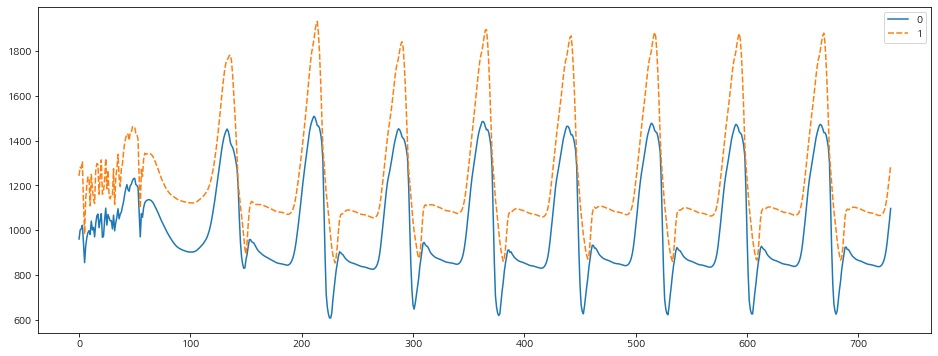

In [59]:
fig, axe = plt.subplots(figsize = (16, 6))
sns.lineplot(scaler.inverse_transform(test_pred), ax = axe)

In [170]:
test_pred.shape

(365, 1)